In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
import suraj_datalab as sd

In [22]:
# set the display option to show all columns
pd.set_option('display.max_columns', None)

In [23]:
train = pd.read_csv('../input/train.csv')
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
train.shape

(76518, 38)

In [5]:
train.Target.value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

In [6]:
train.Target.value_counts(normalize=True)*100

Target
Graduate    47.416294
Dropout     33.058888
Enrolled    19.524818
Name: proportion, dtype: float64

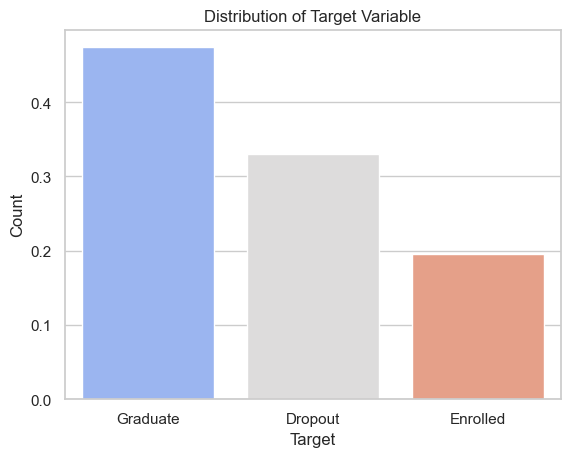

In [7]:
# Create a bar plot for distiribution of target variable for blog post

# set a style for the plot
sns.set_theme(style="whitegrid")

# Create the bar plot
sns.barplot(
    x=train.Target.value_counts(normalize=True).index,
    y=train.Target.value_counts(normalize=True).values,
    palette=sns.color_palette("coolwarm", 3),
    hue=train.Target.value_counts(normalize=True).index,
    legend=False
)

# Add labels and title 
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')

# Save the plot
plt.savefig('../images/target_distribution.png', dpi=300)

# Show the plot
plt.show()

In [21]:
train.isna().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [8]:
help(sd)

Help on package suraj_datalab:

NAME
    suraj_datalab

PACKAGE CONTENTS
    analyze
    clean
    fold_creator

FILE
    d:\suraj\data science\kaggle\s4e6 academic success\env\lib\site-packages\suraj_datalab\__init__.py




In [9]:
help(sd.analyze)

Help on module suraj_datalab.analyze in suraj_datalab:

NAME
    suraj_datalab.analyze

FUNCTIONS
    categorical_feature(df, feature, target)
        Calculate the distribution of a categorical feature in a DataFrame with respect to a target variable.
        Parameters:
            df (DataFrame): The input DataFrame.
            feature (str): The name of the categorical feature.
            target (str): The name of the target variable.
        Returns:
            DataFrame: A DataFrame containing the distribution of the feature, including the total count, total percentage,
                       percentages for each target class relative to the total, and percentages of each target class within
                       the feature category.
        Raises:
            None

    is_jupyter_notebook()
        Check if the code is running in a Jupyter notebook environment.

        Returns:
            bool: True if running in a Jupyter notebook or JupyterLab, False otherwise.

    mi

In [27]:
# Drop the id column as it is not needed for analysis
if 'id' in train.columns:
    train.drop('id', axis=1, inplace=True)

In [28]:
# Numerical and Categorical columns
num_cols = train.select_dtypes(include=np.number).columns
cat_cols = train.select_dtypes(include='object').columns

print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)

Numerical Columns: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Cur

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                 

In [30]:
train.nunique()

Marital status                                       6
Application mode                                    22
Application order                                    8
Course                                              19
Daytime/evening attendance                           2
Previous qualification                              21
Previous qualification (grade)                     110
Nacionality                                         18
Mother's qualification                              35
Father's qualification                              39
Mother's occupation                                 40
Father's occupation                                 56
Admission grade                                    668
Displaced                                            2
Educational special needs                            2
Debtor                                               2
Tuition fees up to date                              2
Gender                                               2
Scholarshi

In [31]:
train.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,23.425076,8.583196,8.882172,125.363971,0.569265,0.003738,0.071382,0.893646,0.315821,0.247393,22.278653,0.006626,0.188871,5.891516,7.352362,4.178520,9.995862,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,14.921164,17.471591,16.803940,12.562328,0.495182,0.061023,0.257463,0.308292,0.464845,0.431500,6.889241,0.081130,1.175296,1.671776,3.508292,2.687995,5.264224,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,4.000000,4.000000,5.000000,118.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.666667,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,7.000000,7.000000,124.600000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,6.000000,7.000000,5.000000,12.166667,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,132.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,23.000000,0.000000,0.000000,6.000000,9.000000,6.000000,13.314286,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [34]:
help(sd.analyze.numerical_feature)

Help on function numerical_feature in module suraj_datalab.analyze:

numerical_feature(df, feature, target=None, figsize=(15, 6), bins='sturges')
    Analyzes a numerical feature in a dataframe.
    Parameters:
    - df (pandas.DataFrame): The dataframe containing the data.
    - feature (str): The name of the numerical feature to analyze.
    - target (str, optional): The name of the target column for grouping the analysis. Default is None.
    - figsize (tuple, optional): The size of the figure. Default is (15, 6).
    - bins (int, str, optional): The number of bins for the histogram or the method to calculate it. Default is 'sturges'.
    Returns:
    - outliers_df (pandas.DataFrame): A dataframe containing the percentage of outliers in the data.
    - summary_df (pandas.DataFrame): A dataframe containing the overall statistics, lower outliers statistics, and upper outliers statistics.



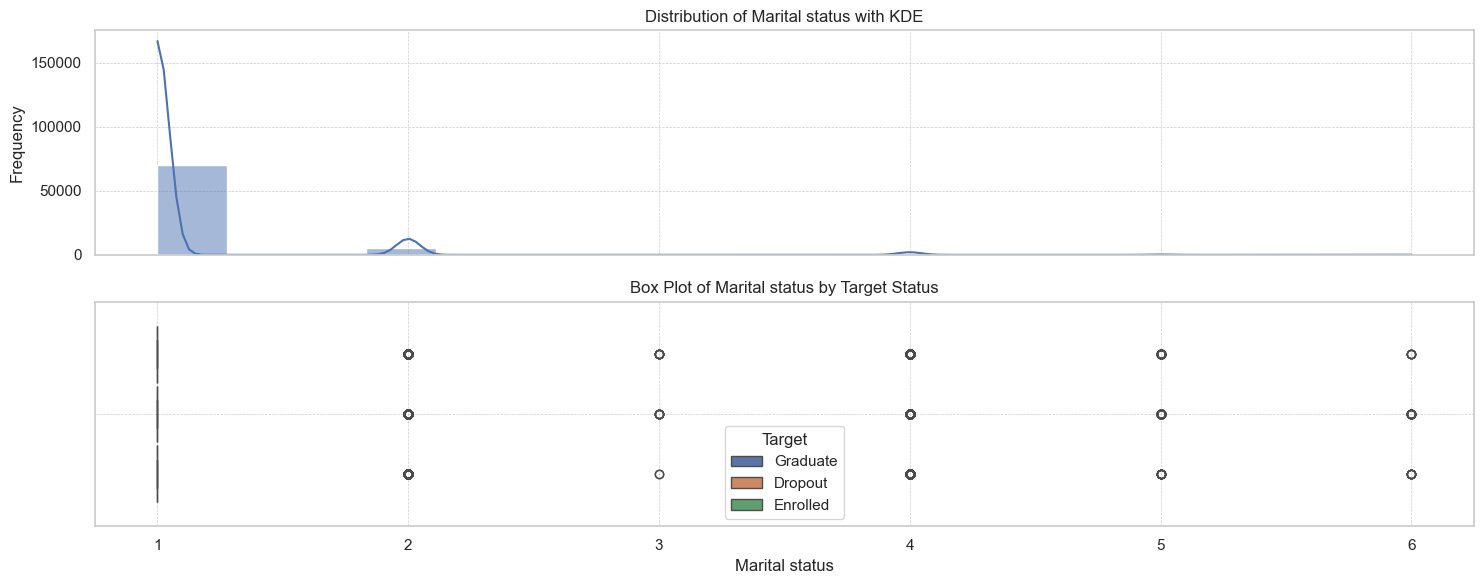

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,8.271256,0.0,8.271256


,count,mean,std,min,25%,50%,75%,max
Marital status_Overall,76518.0,1.111934,0.441669,1.0,1.0,1.0,1.0,6.0
Marital status_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital status_Upper_Outliers,6329.0,2.353294,0.823758,2.0,2.0,2.0,2.0,6.0


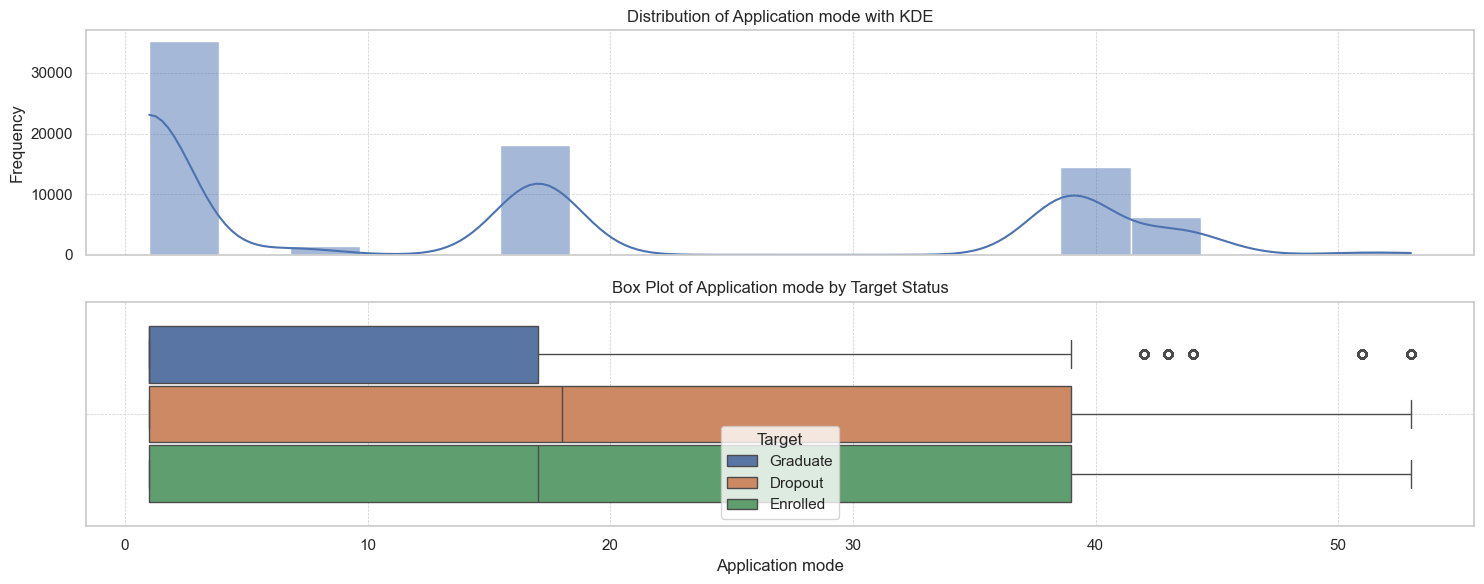

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Application mode_Overall,76518.0,16.054419,16.682337,1.0,1.0,17.0,39.0,53.0
Application mode_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Application mode_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


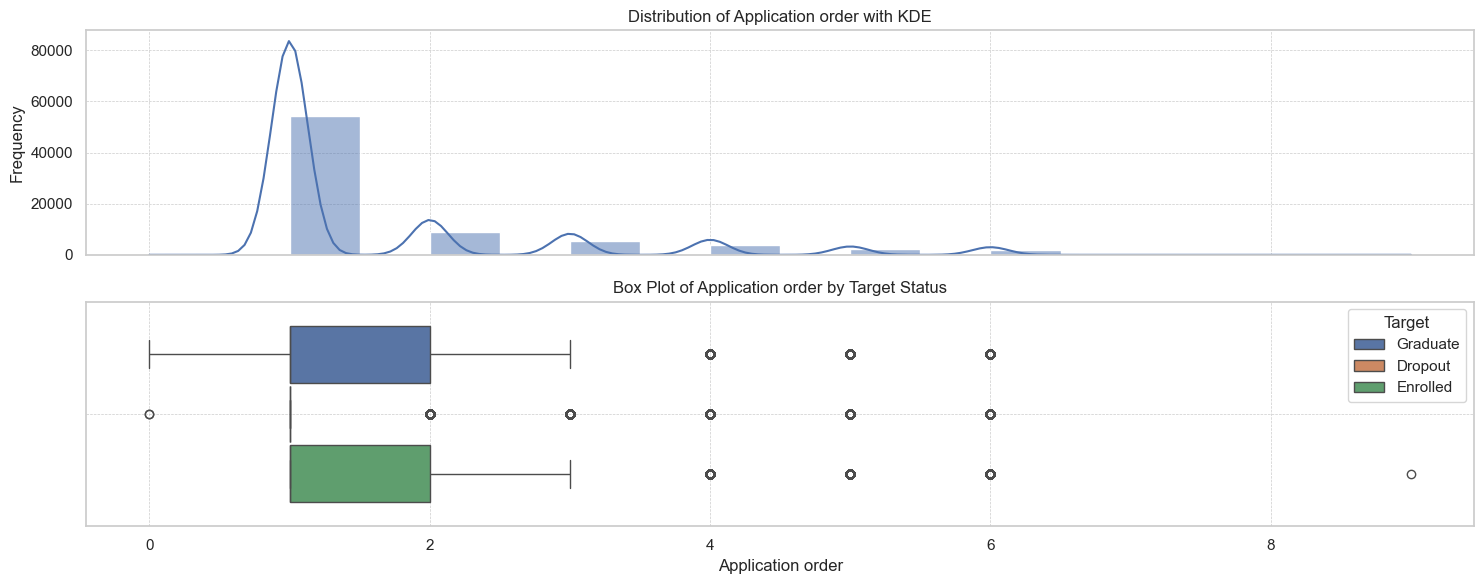

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,10.317834,0.0,10.317834


,count,mean,std,min,25%,50%,75%,max
Application order_Overall,76518.0,1.644410,1.229645,0.0,1.0,1.0,2.0,9.0
Application order_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Application order_Upper_Outliers,7895.0,4.763015,0.822597,4.0,4.0,5.0,5.0,9.0


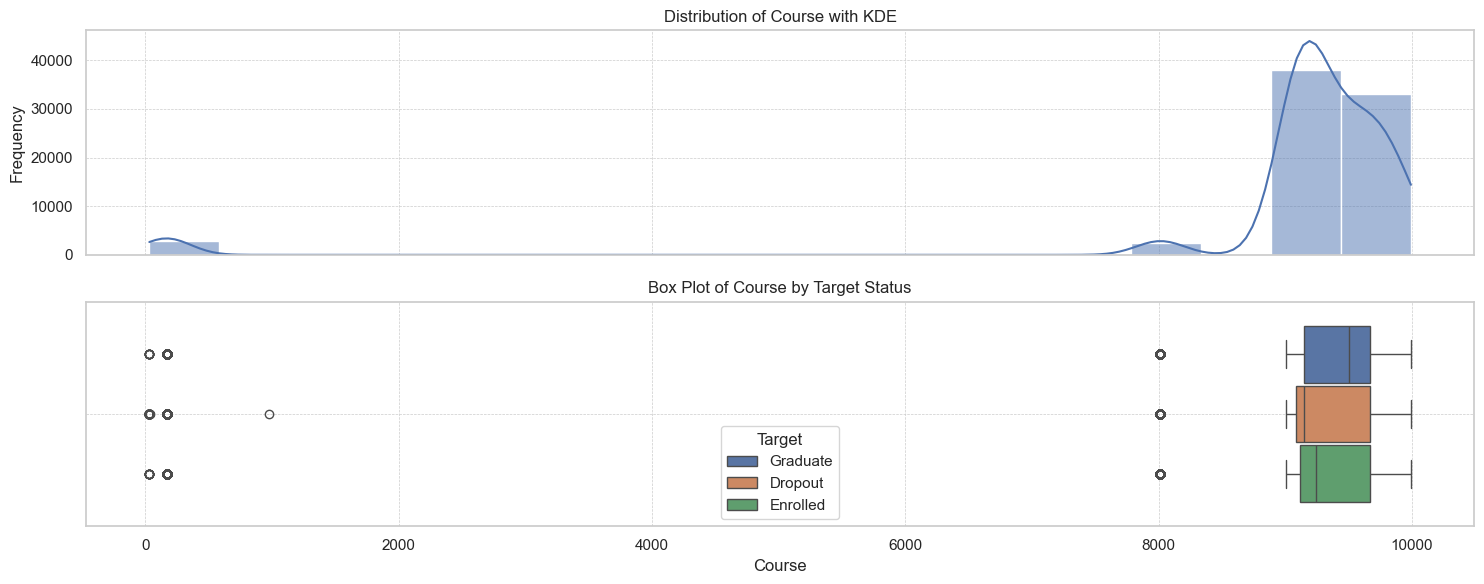

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,7.019263,7.019263,0.0


,count,mean,std,min,25%,50%,75%,max
Course_Overall,76518.0,9001.286377,1803.438531,33.0,9119.0,9254.0,9670.0,9991.0
Course_Lower_Outliers,5371.0,3729.364178,3906.793874,33.0,171.0,171.0,8014.0,8014.0
Course_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


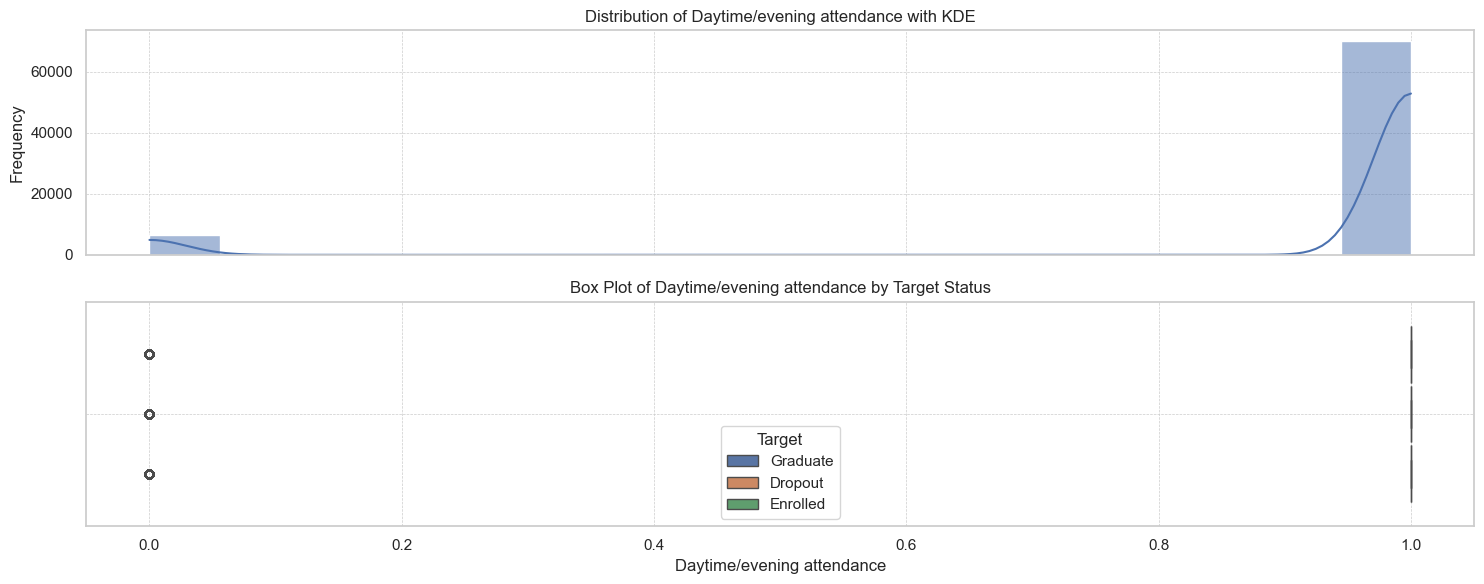

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,8.468596,8.468596,0.0


,count,mean,std,min,25%,50%,75%,max
Daytime/evening attendance_Overall,76518.0,0.915314,0.278416,0.0,1.0,1.0,1.0,1.0
Daytime/evening attendance_Lower_Outliers,6480.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Daytime/evening attendance_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


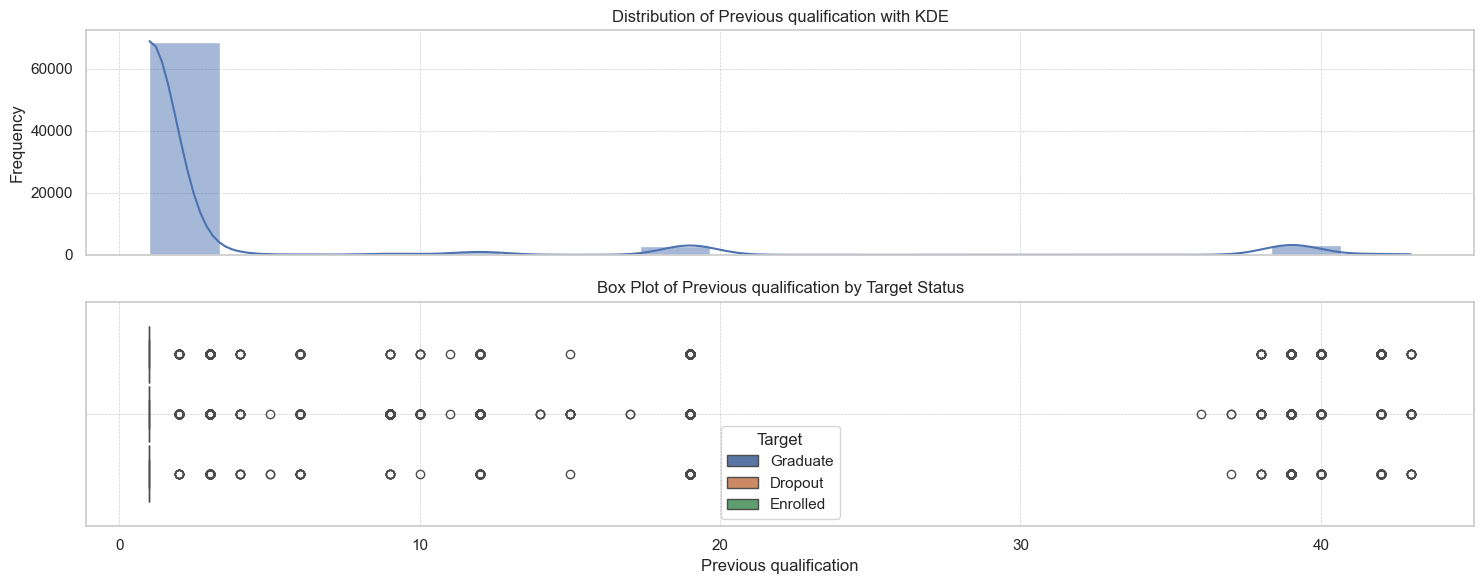

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,12.199744,0.0,12.199744


,count,mean,std,min,25%,50%,75%,max
Previous qualification_Overall,76518.0,3.658760,8.623774,1.0,1.0,1.0,1.0,43.0
Previous qualification_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previous qualification_Upper_Outliers,9335.0,22.793573,13.877874,2.0,12.0,19.0,39.0,43.0


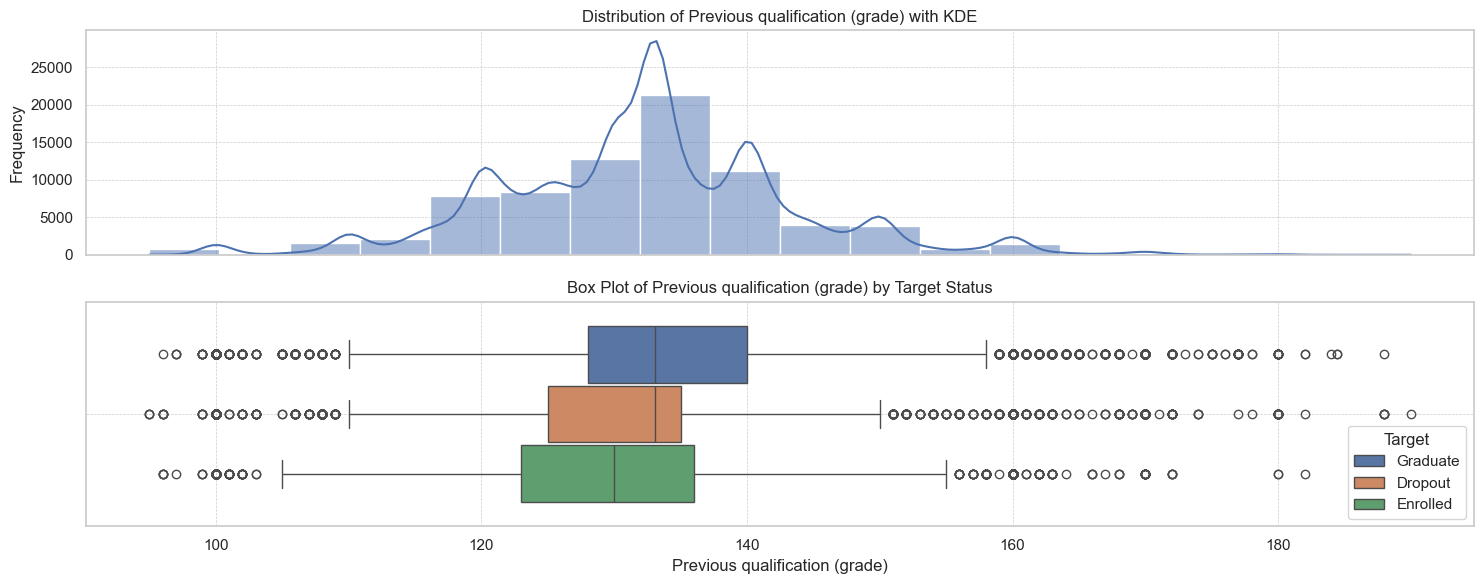

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,1.782587,1.028516,0.754071


,count,mean,std,min,25%,50%,75%,max
Previous qualification (grade)_Overall,76518.0,132.378766,10.995328,95.0,125.0,133.1,140.0,190.0
Previous qualification (grade)_Lower_Outliers,787.0,100.041931,0.787640,95.0,100.0,100.0,100.0,102.0
Previous qualification (grade)_Upper_Outliers,577.0,169.491681,5.186293,162.9,165.0,170.0,170.0,190.0


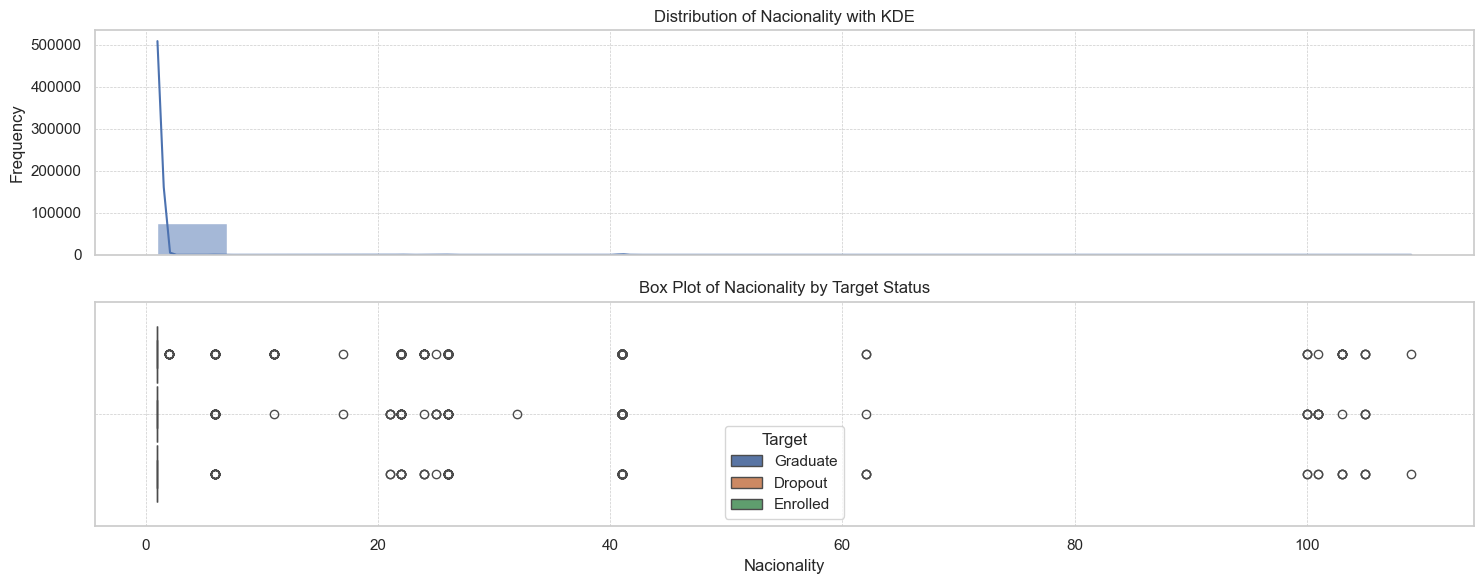

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.659975,0.0,0.659975


,count,mean,std,min,25%,50%,75%,max
Nacionality_Overall,76518.0,1.226600,3.392183,1.0,1.0,1.0,1.0,109.0
Nacionality_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nacionality_Upper_Outliers,505.0,35.334653,23.949121,2.0,22.0,41.0,41.0,109.0


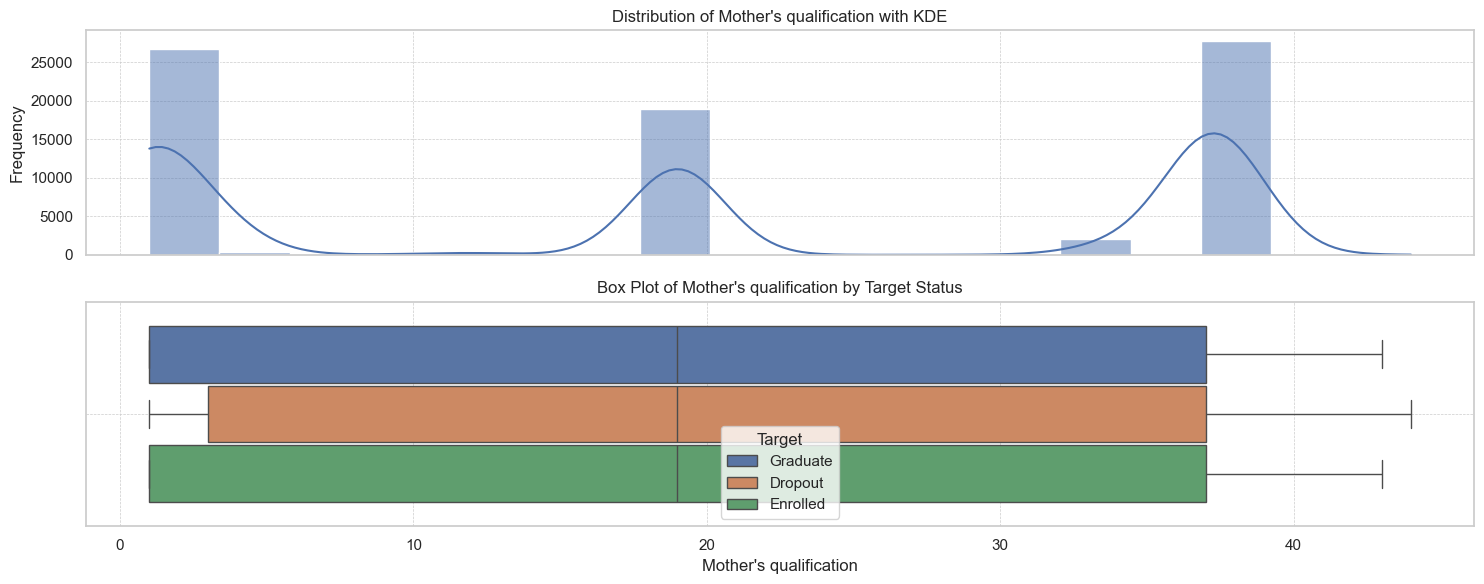

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Mother's qualification_Overall,76518.0,19.837633,15.399456,1.0,1.0,19.0,37.0,44.0
Mother's qualification_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mother's qualification_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


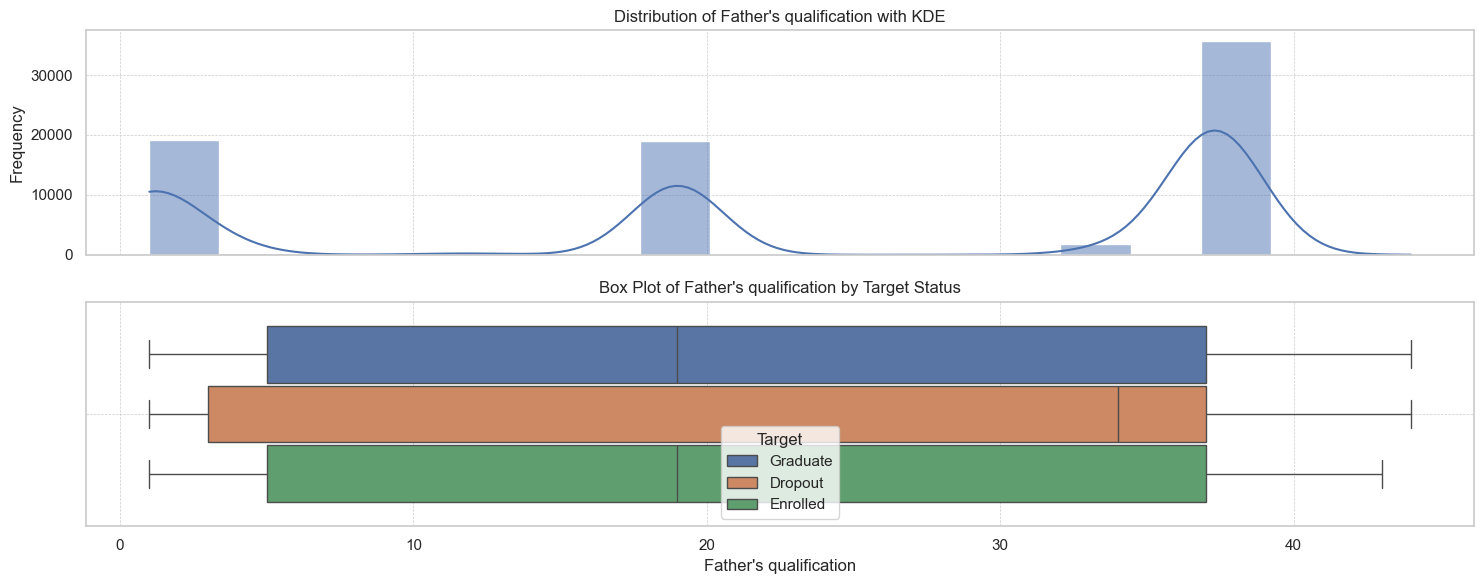

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Father's qualification_Overall,76518.0,23.425076,14.921164,1.0,4.0,19.0,37.0,44.0
Father's qualification_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Father's qualification_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


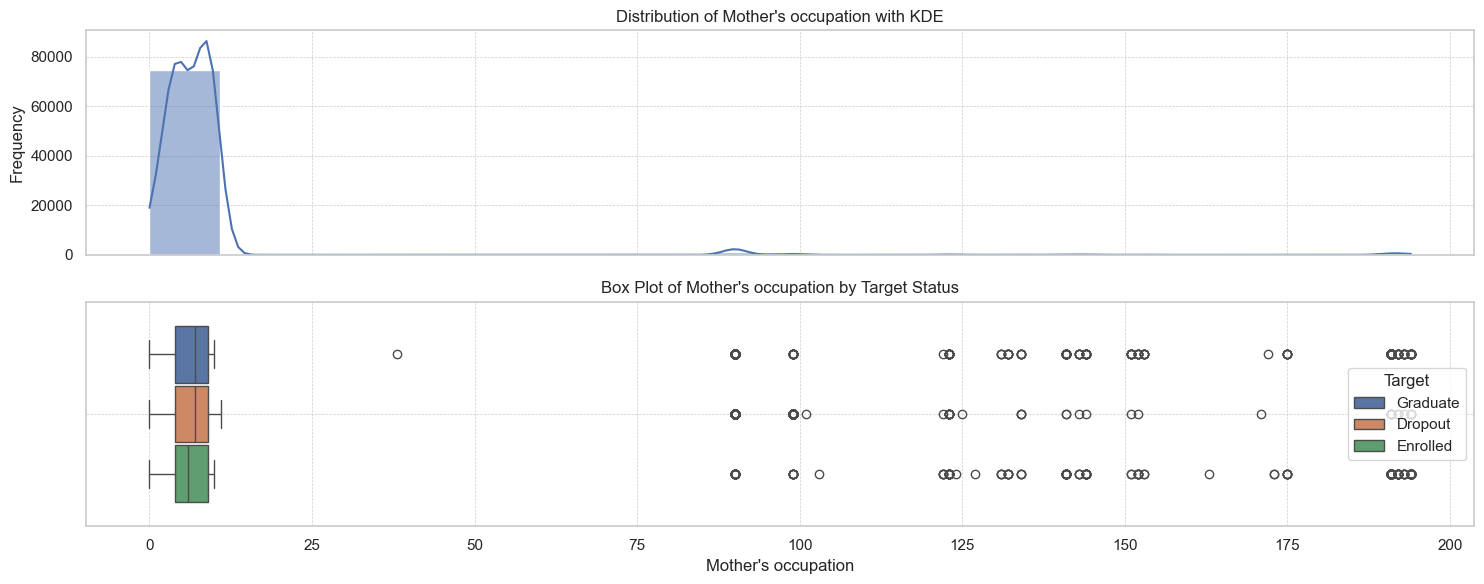

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,2.169424,0.0,2.169424


,count,mean,std,min,25%,50%,75%,max
Mother's occupation_Overall,76518.0,8.583196,17.471591,0.0,4.0,7.0,9.0,194.0
Mother's occupation_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mother's occupation_Upper_Outliers,1660.0,117.237952,40.720182,38.0,90.0,90.0,141.0,194.0


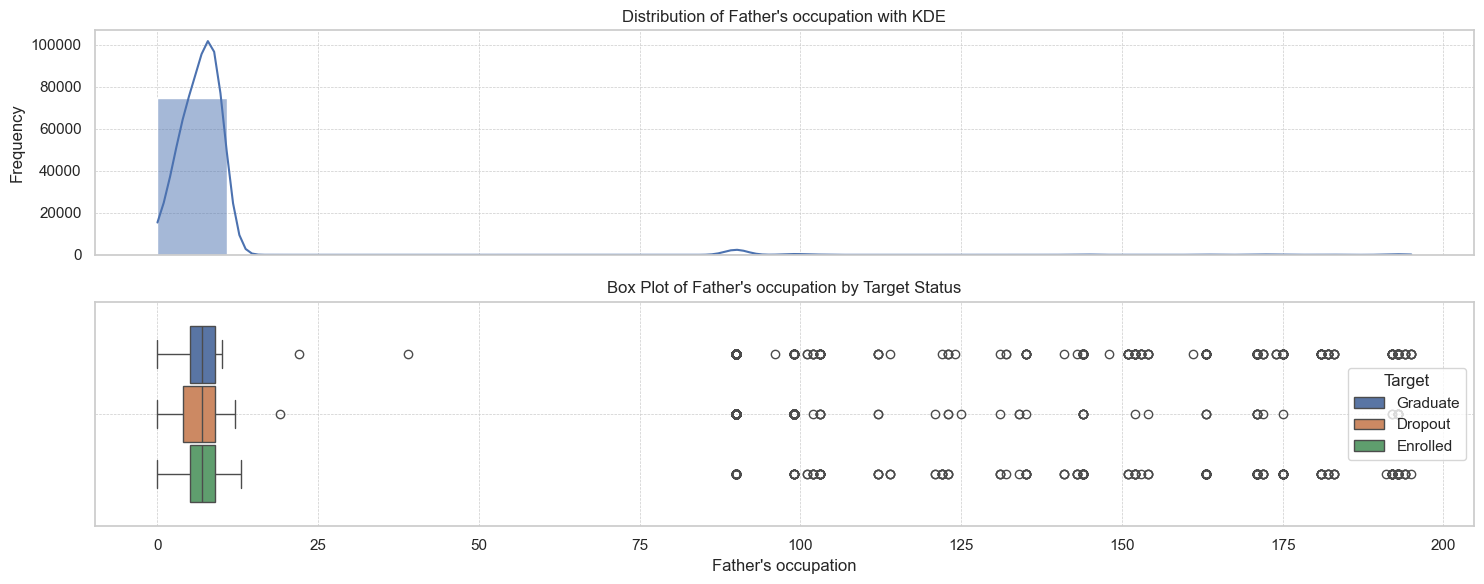

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,2.200789,0.0,2.200789


,count,mean,std,min,25%,50%,75%,max
Father's occupation_Overall,76518.0,8.882172,16.803940,0.0,5.0,7.0,9.0,195.0
Father's occupation_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Father's occupation_Upper_Outliers,1684.0,113.571853,36.389295,19.0,90.0,90.0,144.0,195.0


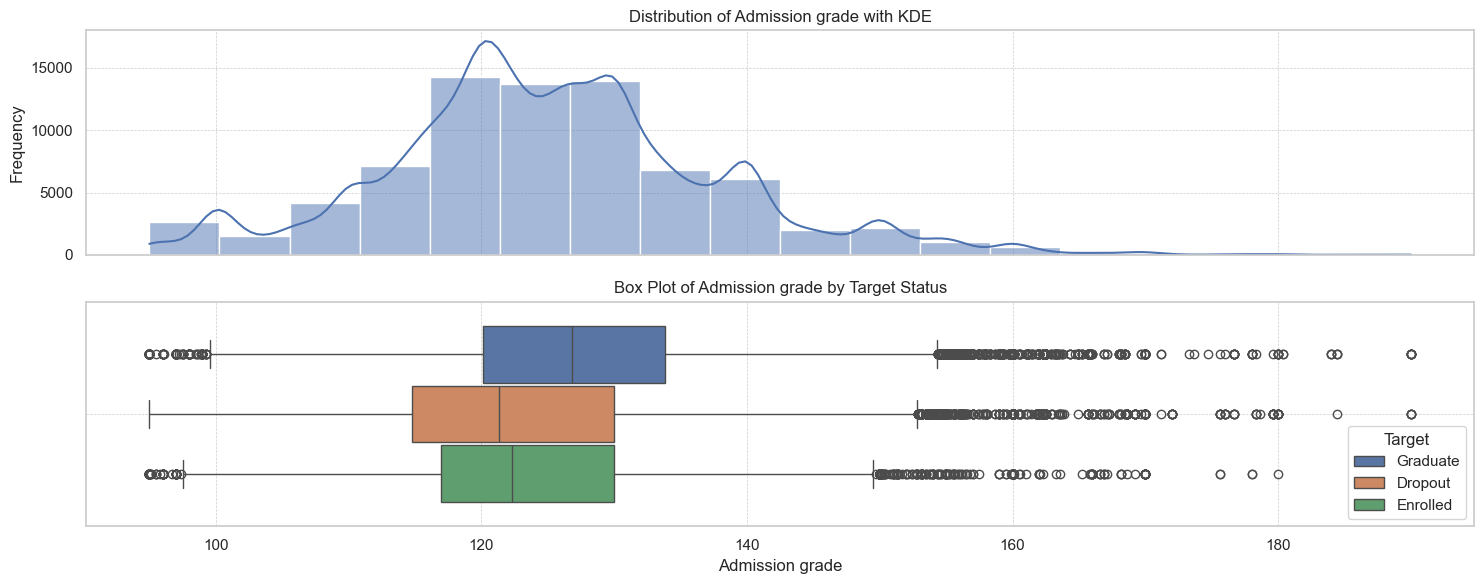

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,3.367835,0.717478,2.650357


,count,mean,std,min,25%,50%,75%,max
Admission grade_Overall,76518.0,125.363971,12.562328,95.0,118.0,124.6,132.0,190.0
Admission grade_Lower_Outliers,549.0,95.414208,0.534143,95.0,95.0,95.0,96.0,96.7
Admission grade_Upper_Outliers,2028.0,159.653550,6.343272,153.1,155.0,158.7,161.0,190.0


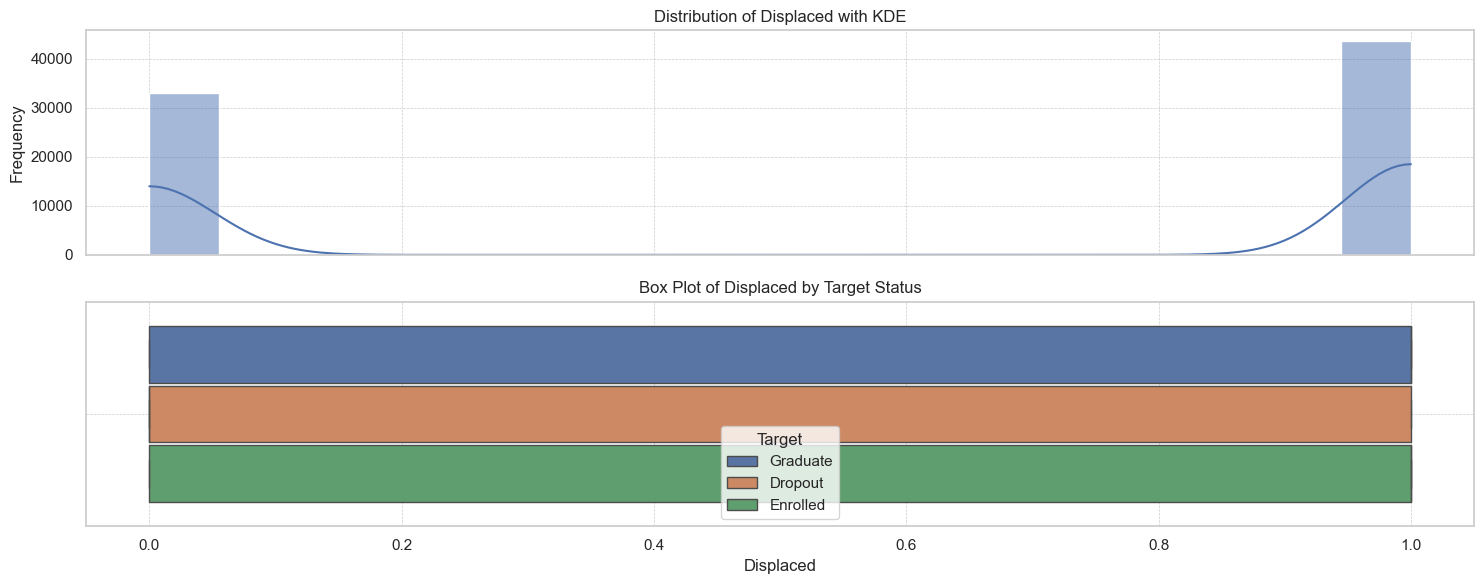

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Displaced_Overall,76518.0,0.569265,0.495182,0.0,0.0,1.0,1.0,1.0
Displaced_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Displaced_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


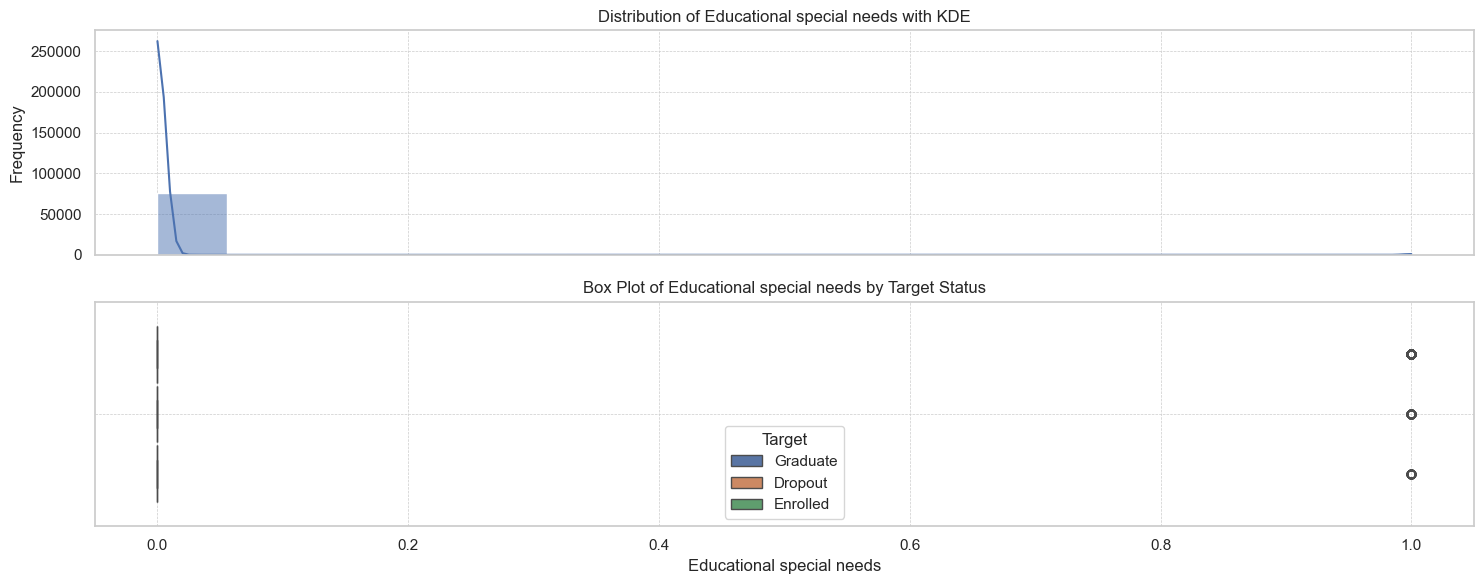

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.373768,0.0,0.373768


,count,mean,std,min,25%,50%,75%,max
Educational special needs_Overall,76518.0,0.003738,0.061023,0.0,0.0,0.0,0.0,1.0
Educational special needs_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Educational special needs_Upper_Outliers,286.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


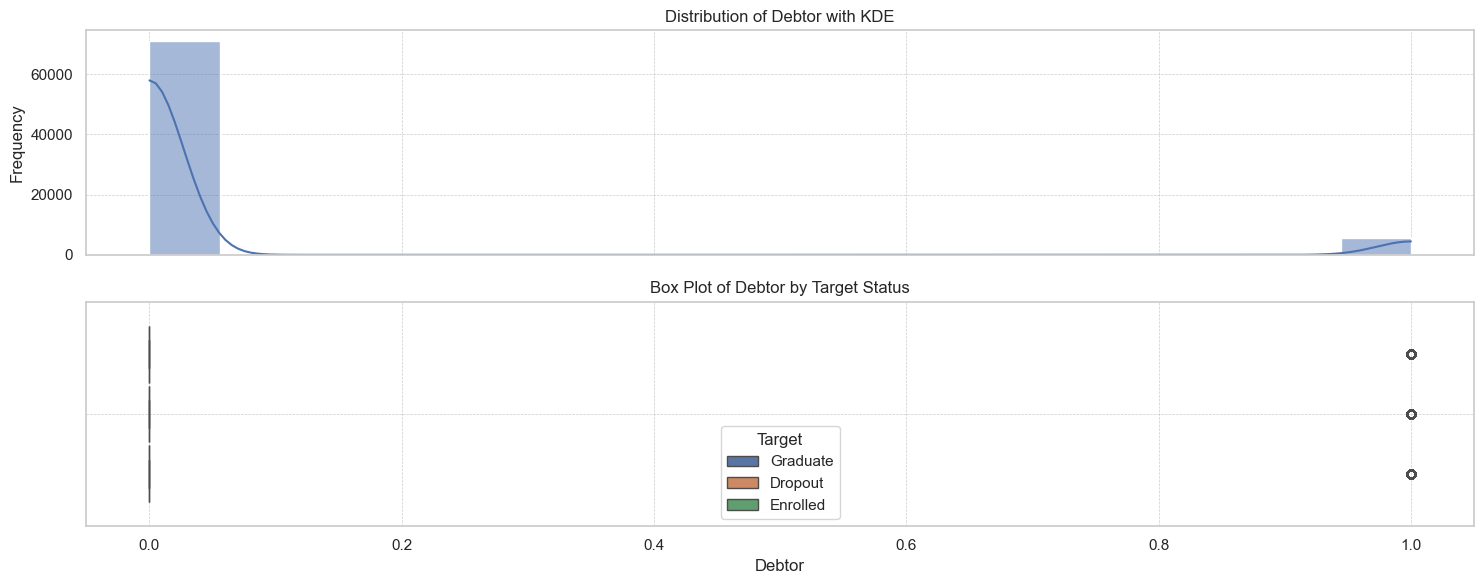

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,7.13819,0.0,7.13819


,count,mean,std,min,25%,50%,75%,max
Debtor_Overall,76518.0,0.071382,0.257463,0.0,0.0,0.0,0.0,1.0
Debtor_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Debtor_Upper_Outliers,5462.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


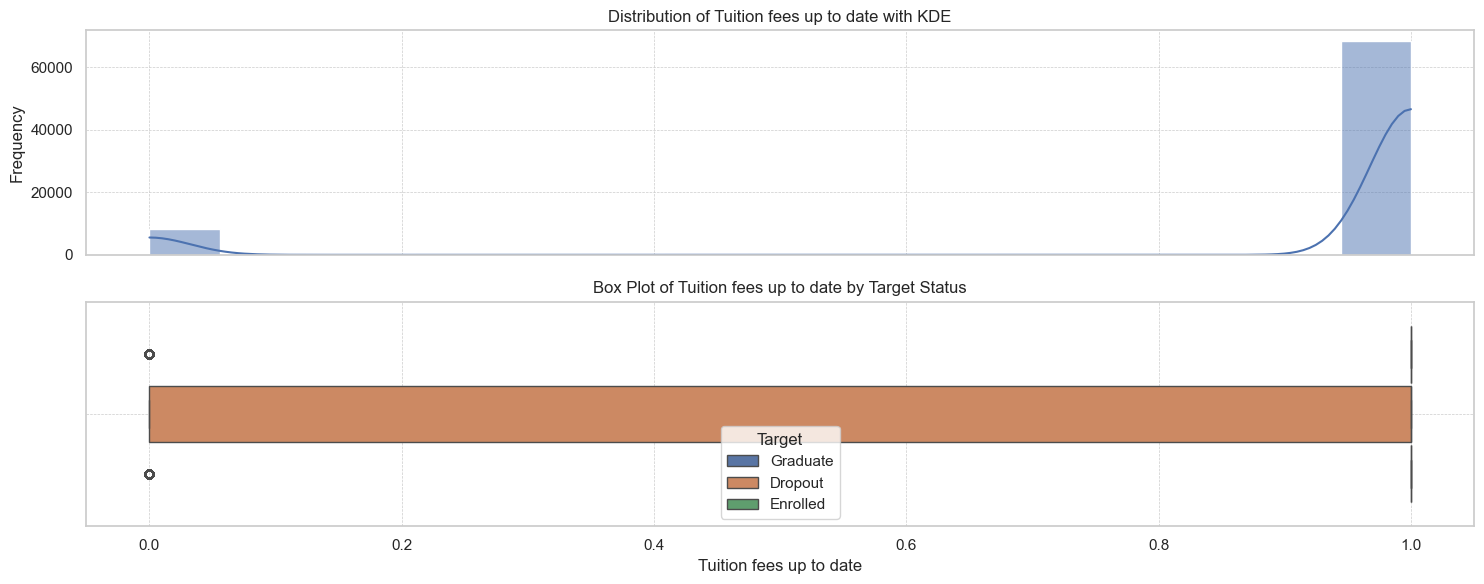

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,10.635406,10.635406,0.0


,count,mean,std,min,25%,50%,75%,max
Tuition fees up to date_Overall,76518.0,0.893646,0.308292,0.0,1.0,1.0,1.0,1.0
Tuition fees up to date_Lower_Outliers,8138.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Tuition fees up to date_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


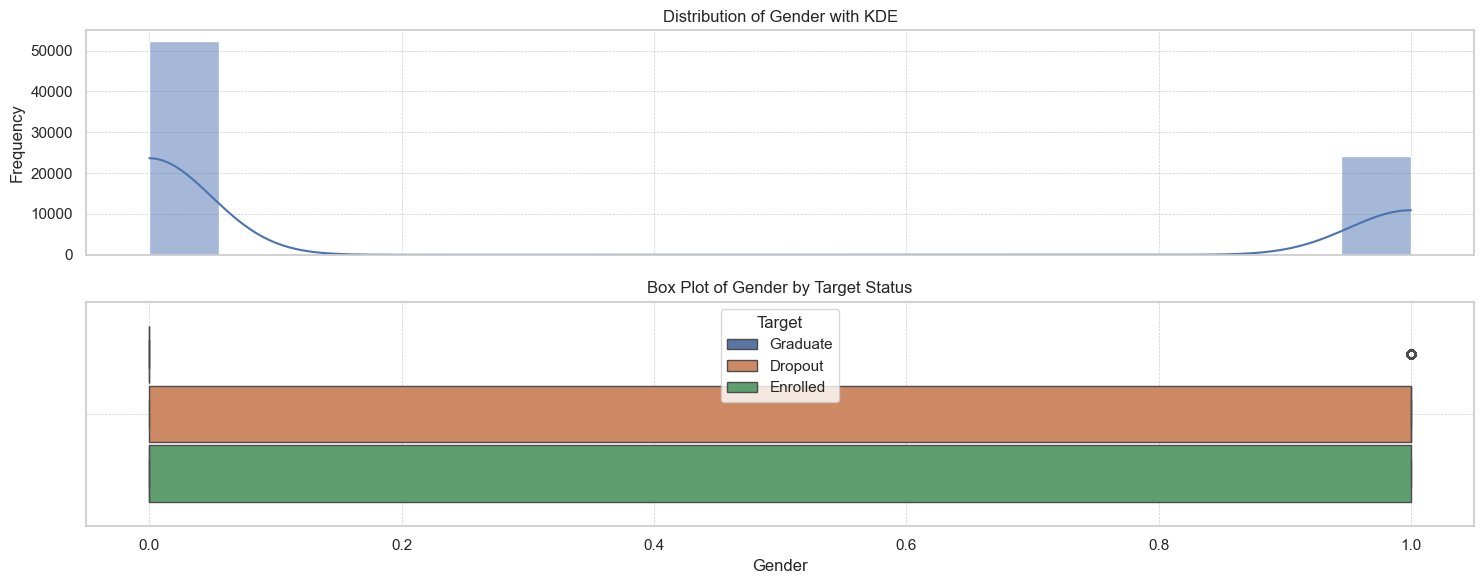

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Gender_Overall,76518.0,0.315821,0.464845,0.0,0.0,0.0,1.0,1.0
Gender_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


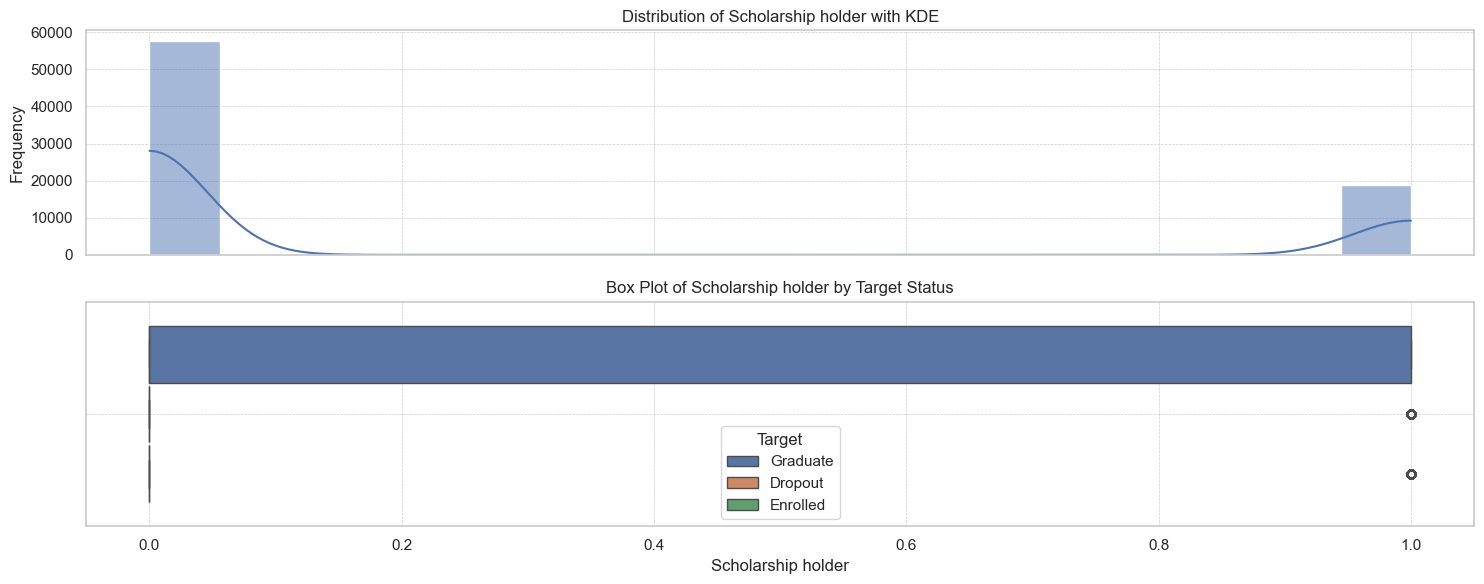

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,24.739277,0.0,24.739277


,count,mean,std,min,25%,50%,75%,max
Scholarship holder_Overall,76518.0,0.247393,0.4315,0.0,0.0,0.0,0.0,1.0
Scholarship holder_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scholarship holder_Upper_Outliers,18930.0,1.000000,0.0000,1.0,1.0,1.0,1.0,1.0


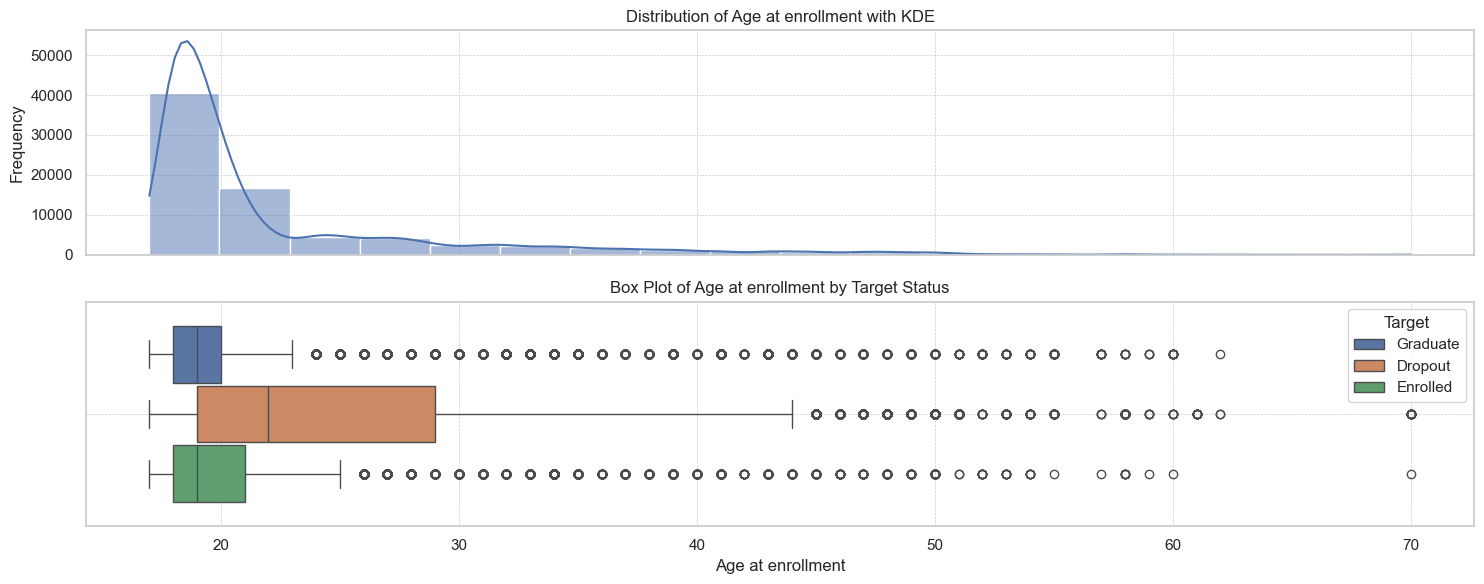

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,11.676991,0.0,11.676991


,count,mean,std,min,25%,50%,75%,max
Age at enrollment_Overall,76518.0,22.278653,6.889241,17.0,18.0,19.0,23.0,70.0
Age at enrollment_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at enrollment_Upper_Outliers,8935.0,38.585450,6.643152,31.0,33.0,37.0,43.0,70.0


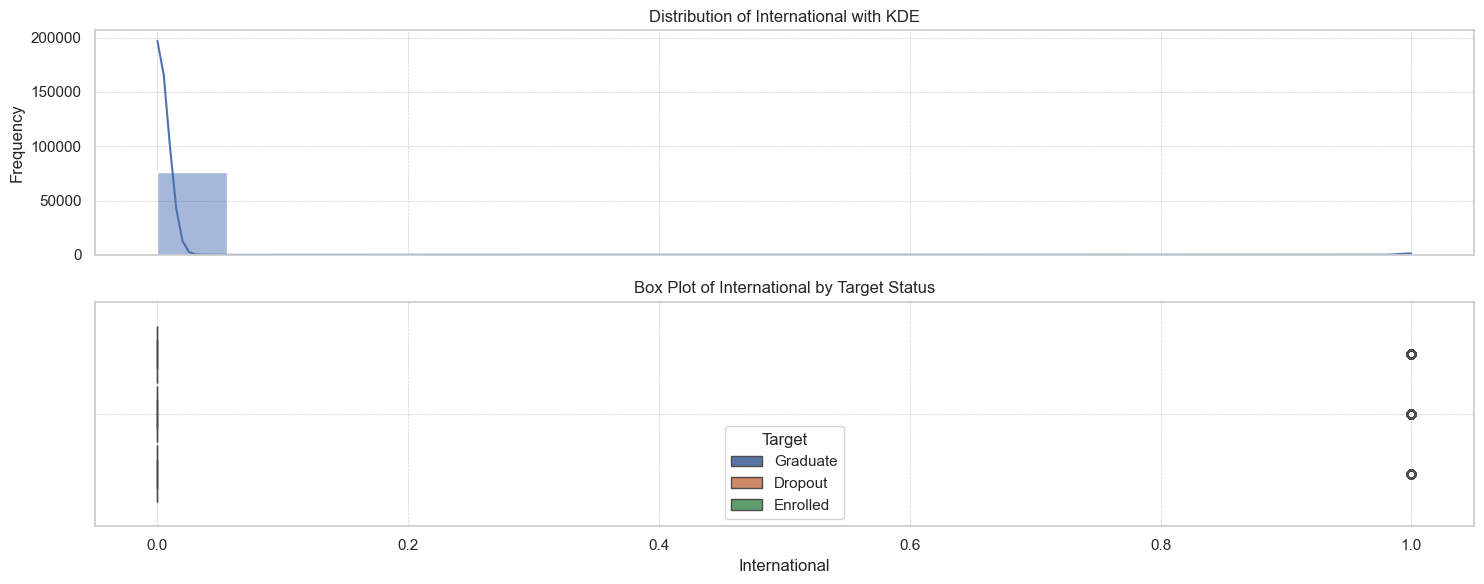

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.662589,0.0,0.662589


,count,mean,std,min,25%,50%,75%,max
International_Overall,76518.0,0.006626,0.08113,0.0,0.0,0.0,0.0,1.0
International_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
International_Upper_Outliers,507.0,1.000000,0.00000,1.0,1.0,1.0,1.0,1.0


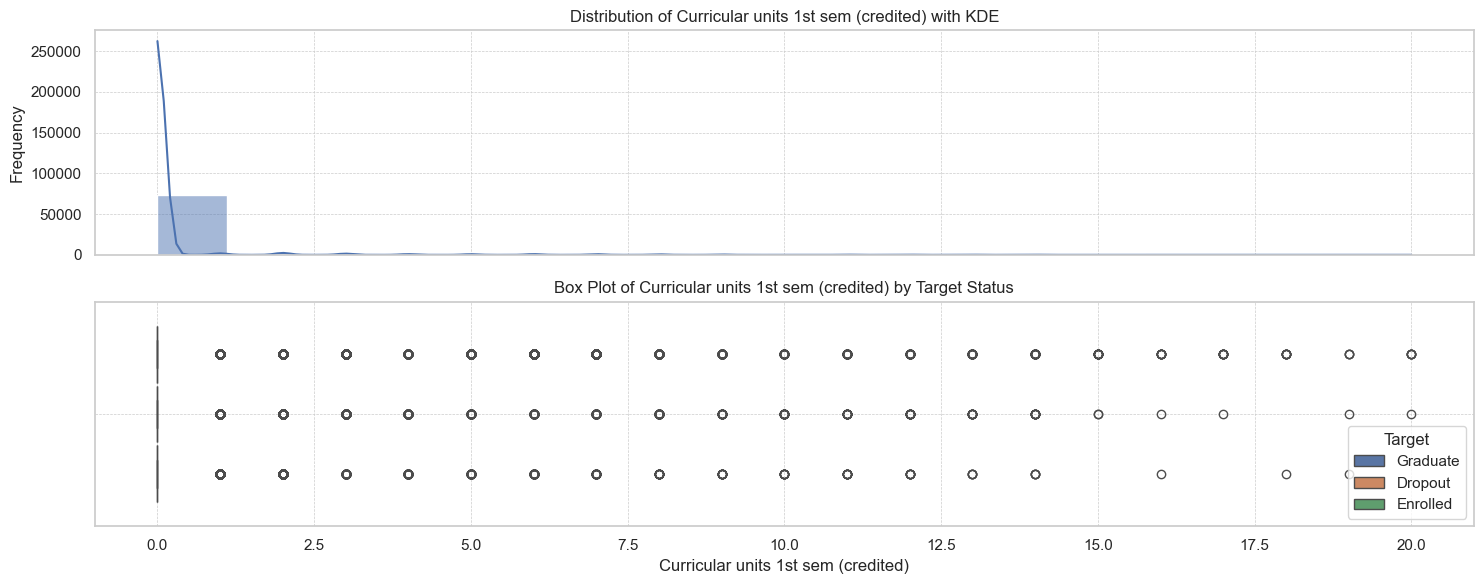

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,4.036959,0.0,4.036959


,count,mean,std,min,25%,50%,75%,max
Curricular units 1st sem (credited)_Overall,76518.0,0.188871,1.175296,0.0,0.0,0.0,0.0,20.0
Curricular units 1st sem (credited)_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Curricular units 1st sem (credited)_Upper_Outliers,3089.0,4.678537,3.635327,1.0,2.0,3.0,7.0,20.0


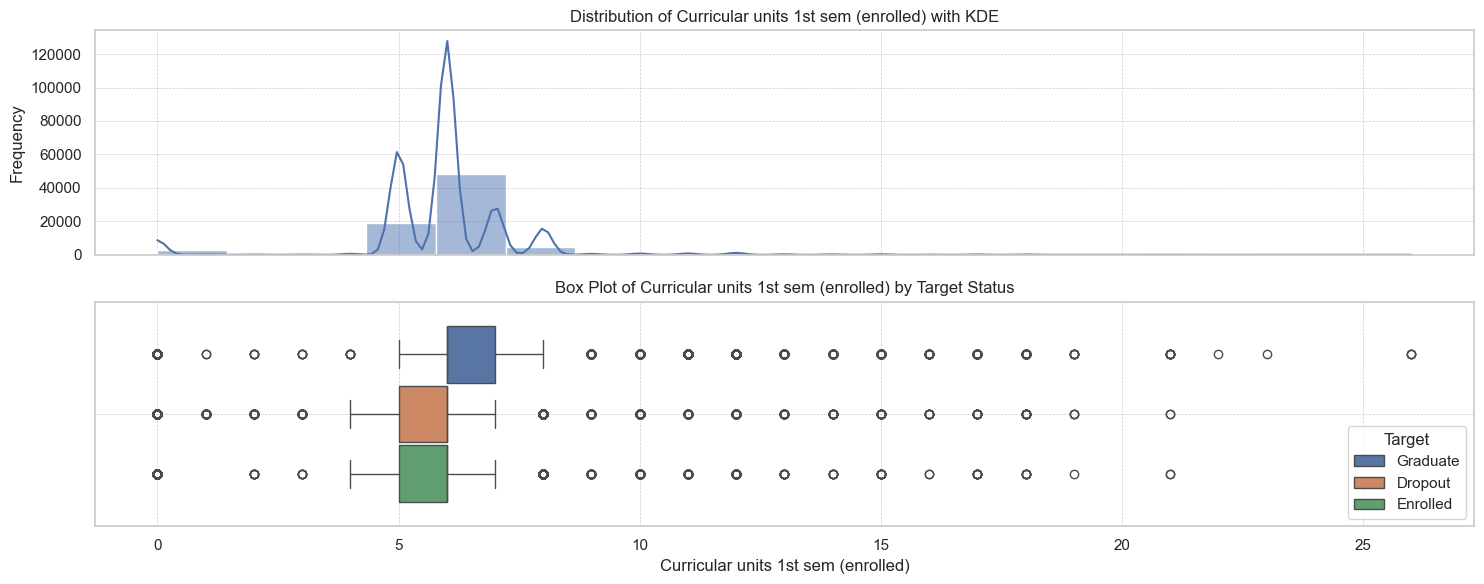

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,11.938367,3.665804,8.272563


,count,mean,std,min,25%,50%,75%,max
Curricular units 1st sem (enrolled)_Overall,76518.0,5.891516,1.671776,0.0,5.0,6.0,6.0,26.0
Curricular units 1st sem (enrolled)_Lower_Outliers,2805.0,0.097683,0.470694,0.0,0.0,0.0,0.0,3.0
Curricular units 1st sem (enrolled)_Upper_Outliers,6330.0,8.991627,2.212540,8.0,8.0,8.0,8.0,26.0


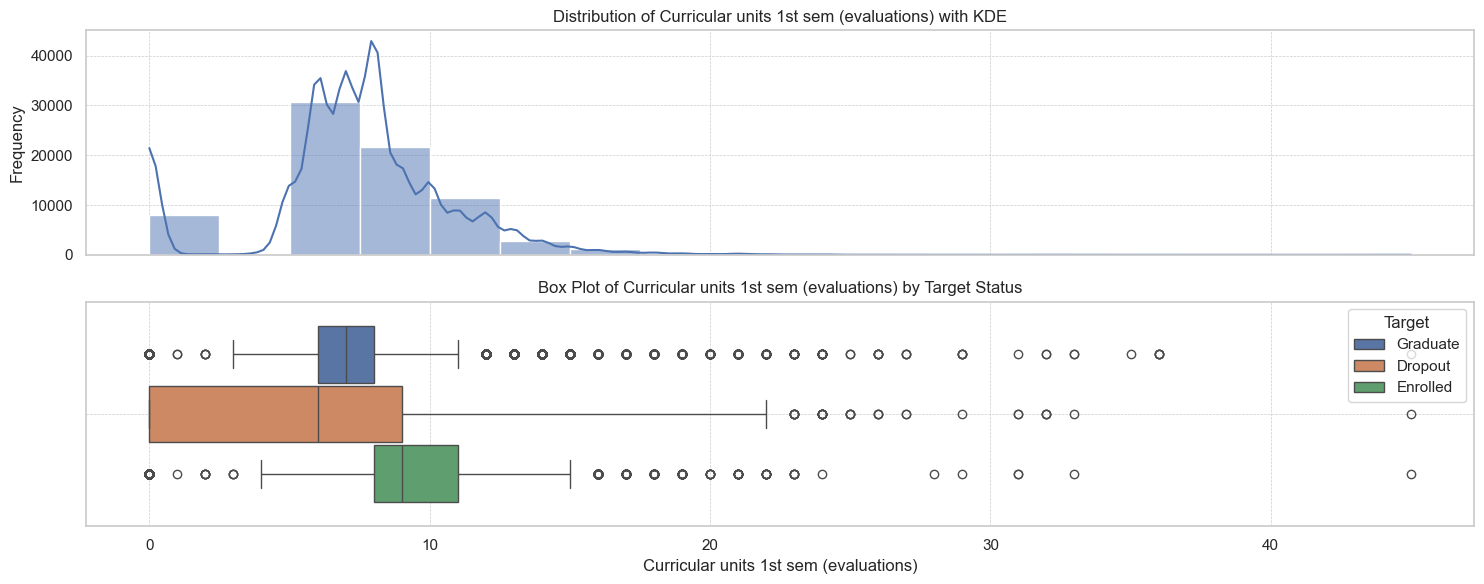

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,13.973183,10.452443,3.52074


,count,mean,std,min,25%,50%,75%,max
Curricular units 1st sem (evaluations)_Overall,76518.0,7.352362,3.508292,0.0,6.0,7.0,9.0,45.0
Curricular units 1st sem (evaluations)_Lower_Outliers,7998.0,0.005876,0.076437,0.0,0.0,0.0,0.0,1.0
Curricular units 1st sem (evaluations)_Upper_Outliers,2694.0,16.069785,3.021207,14.0,14.0,15.0,17.0,45.0


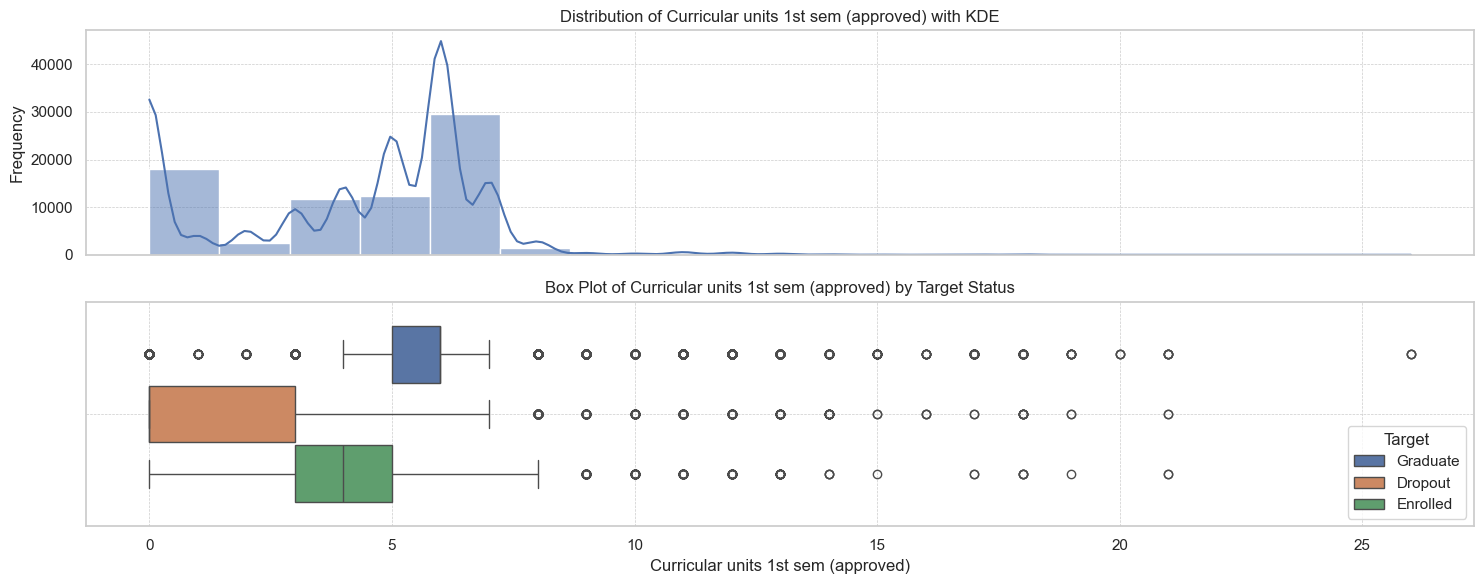

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.382916,0.0,0.382916


,count,mean,std,min,25%,50%,75%,max
Curricular units 1st sem (approved)_Overall,76518.0,4.178520,2.687995,0.0,2.0,5.0,6.0,26.0
Curricular units 1st sem (approved)_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Curricular units 1st sem (approved)_Upper_Outliers,293.0,15.228669,2.580007,13.0,13.0,14.0,17.0,26.0


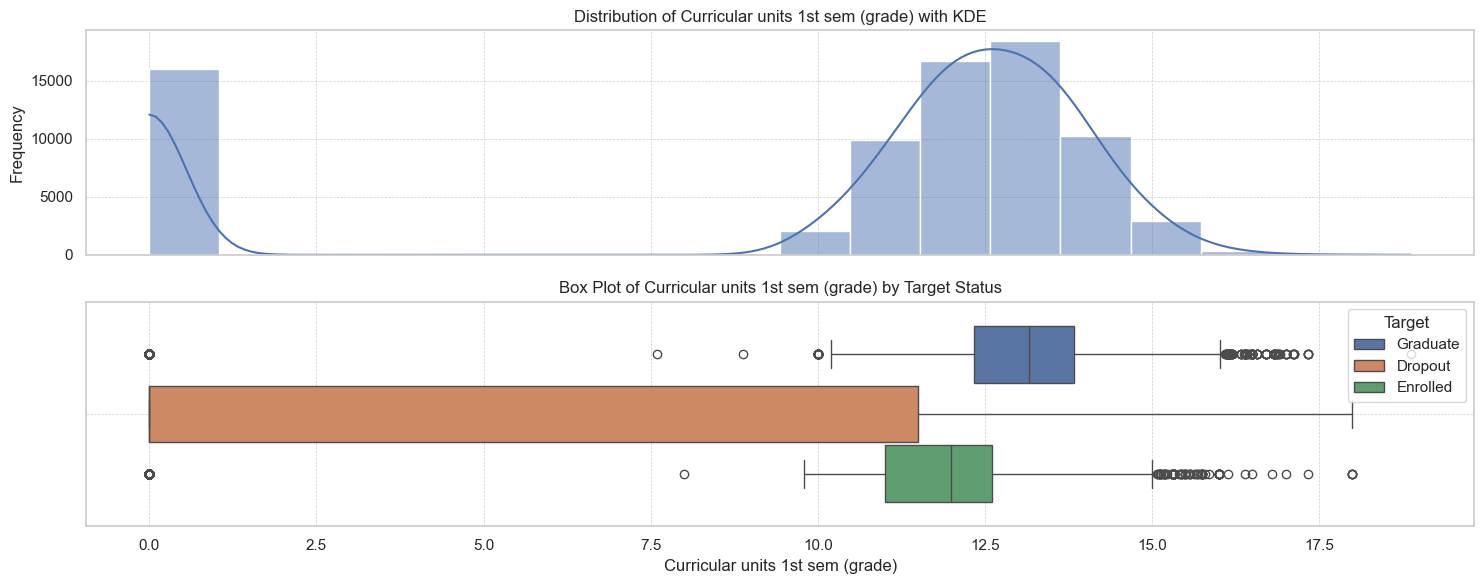

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,20.987219,20.95716,0.030058


,count,mean,std,min,25%,50%,75%,max
Curricular units 1st sem (grade)_Overall,76518.0,9.995862,5.264224,0.000000,10.666667,12.166667,13.314286,18.875000
Curricular units 1st sem (grade)_Lower_Outliers,16036.0,0.000416,0.045440,0.000000,0.000000,0.000000,0.000000,5.666667
Curricular units 1st sem (grade)_Upper_Outliers,23.0,17.835145,0.384451,17.333333,17.333333,18.000000,18.000000,18.875000


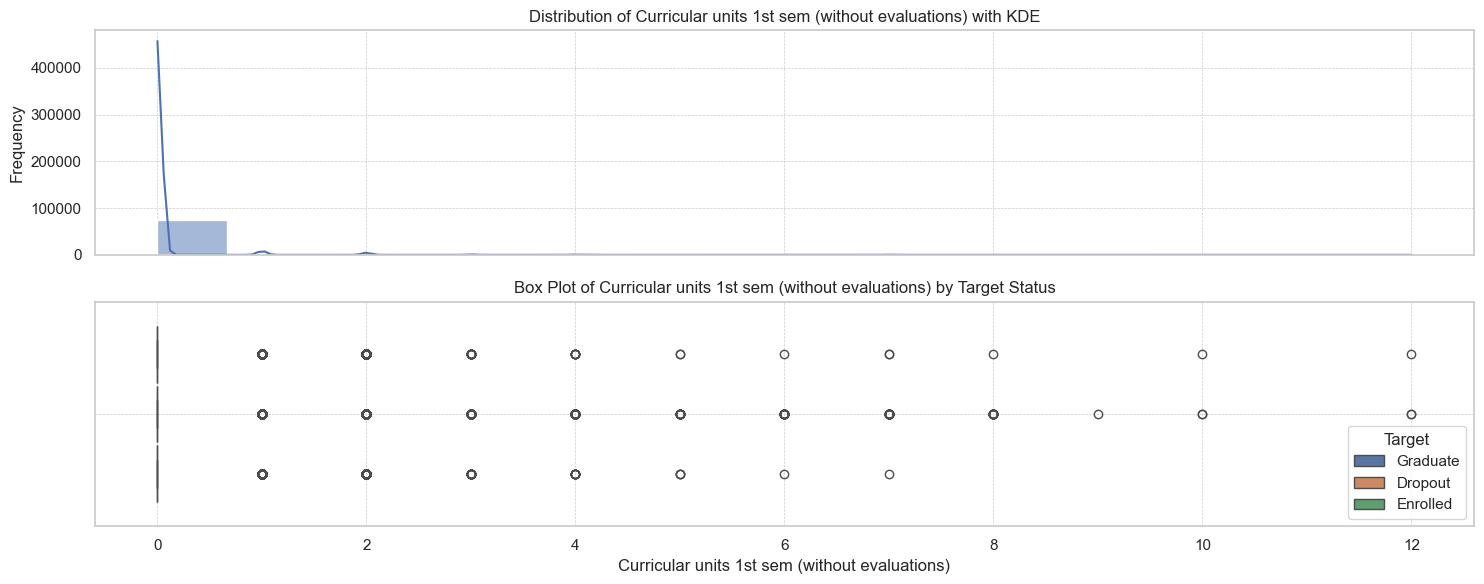

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,3.200554,0.0,3.200554


,count,mean,std,min,25%,50%,75%,max
Curricular units 1st sem (without evaluations)_Overall,76518.0,0.057960,0.408490,0.0,0.0,0.0,0.0,12.0
Curricular units 1st sem (without evaluations)_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Curricular units 1st sem (without evaluations)_Upper_Outliers,2449.0,1.810943,1.428221,1.0,1.0,1.0,2.0,12.0


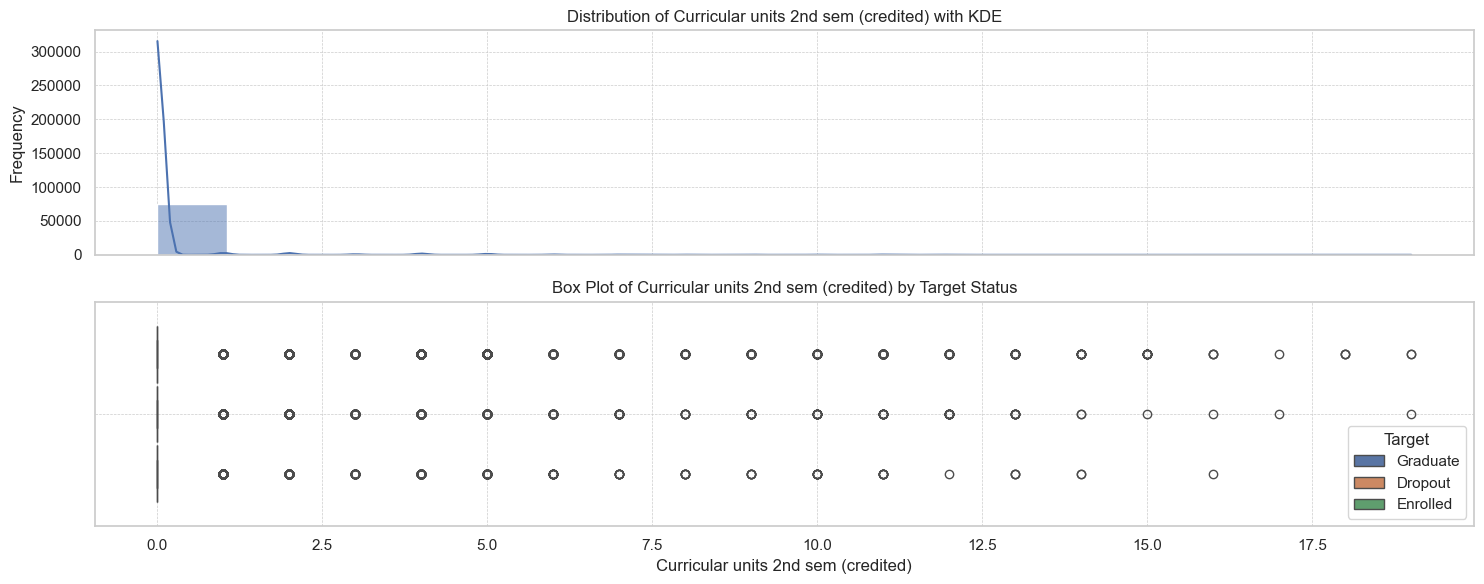

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,3.540343,0.0,3.540343


,count,mean,std,min,25%,50%,75%,max
Curricular units 2nd sem (credited)_Overall,76518.0,0.137053,0.93383,0.0,0.0,0.0,0.0,19.0
Curricular units 2nd sem (credited)_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Curricular units 2nd sem (credited)_Upper_Outliers,2709.0,3.871170,3.19053,1.0,2.0,3.0,5.0,19.0


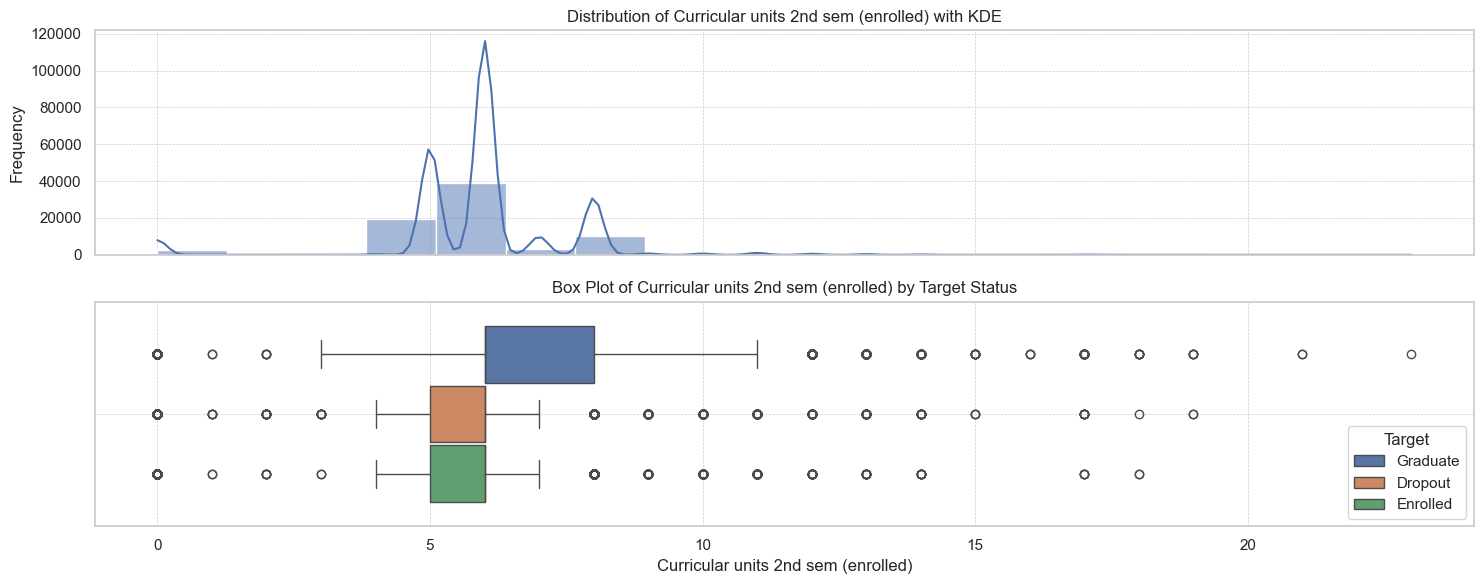

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,18.840012,3.553412,15.286599


,count,mean,std,min,25%,50%,75%,max
Curricular units 2nd sem (enrolled)_Overall,76518.0,5.933414,1.627182,0.0,5.0,6.0,6.0,23.0
Curricular units 2nd sem (enrolled)_Lower_Outliers,2719.0,0.034939,0.282999,0.0,0.0,0.0,0.0,3.0
Curricular units 2nd sem (enrolled)_Upper_Outliers,11697.0,8.360092,1.223113,8.0,8.0,8.0,8.0,23.0


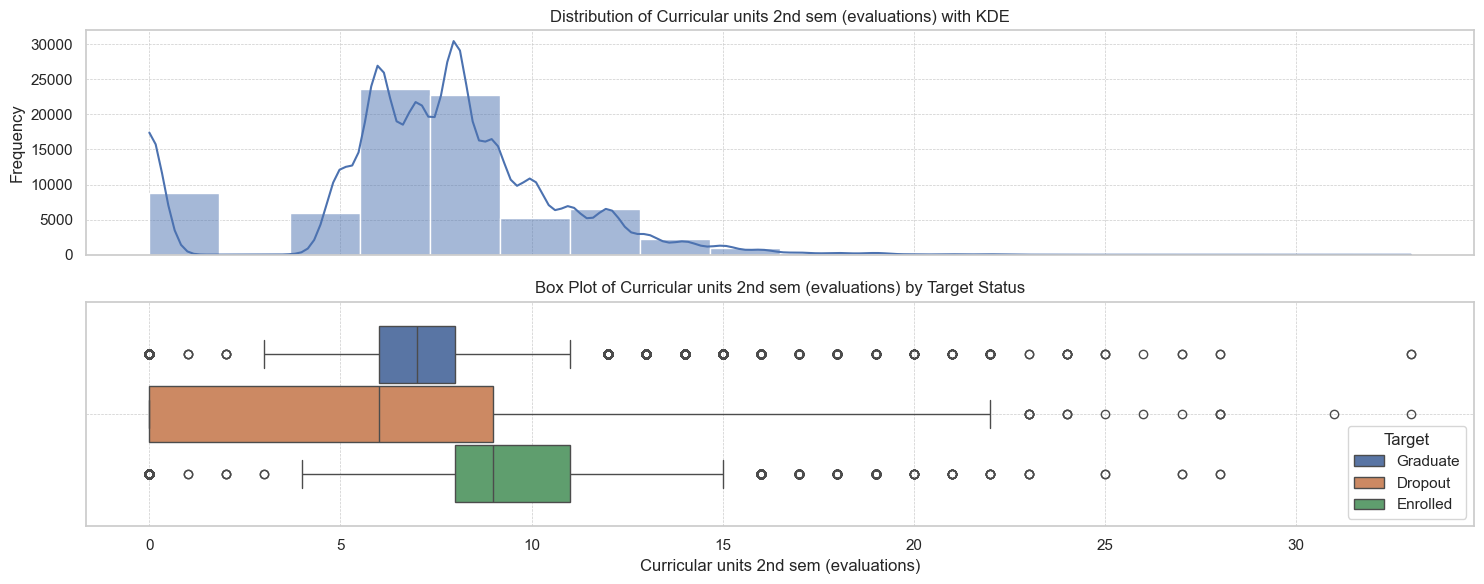

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,14.70765,11.504483,3.203168


,count,mean,std,min,25%,50%,75%,max
Curricular units 2nd sem (evaluations)_Overall,76518.0,7.234468,3.503040,0.0,6.0,7.0,9.0,33.0
Curricular units 2nd sem (evaluations)_Lower_Outliers,8803.0,0.001250,0.035329,0.0,0.0,0.0,0.0,1.0
Curricular units 2nd sem (evaluations)_Upper_Outliers,2451.0,15.715218,2.325302,14.0,14.0,15.0,16.0,33.0


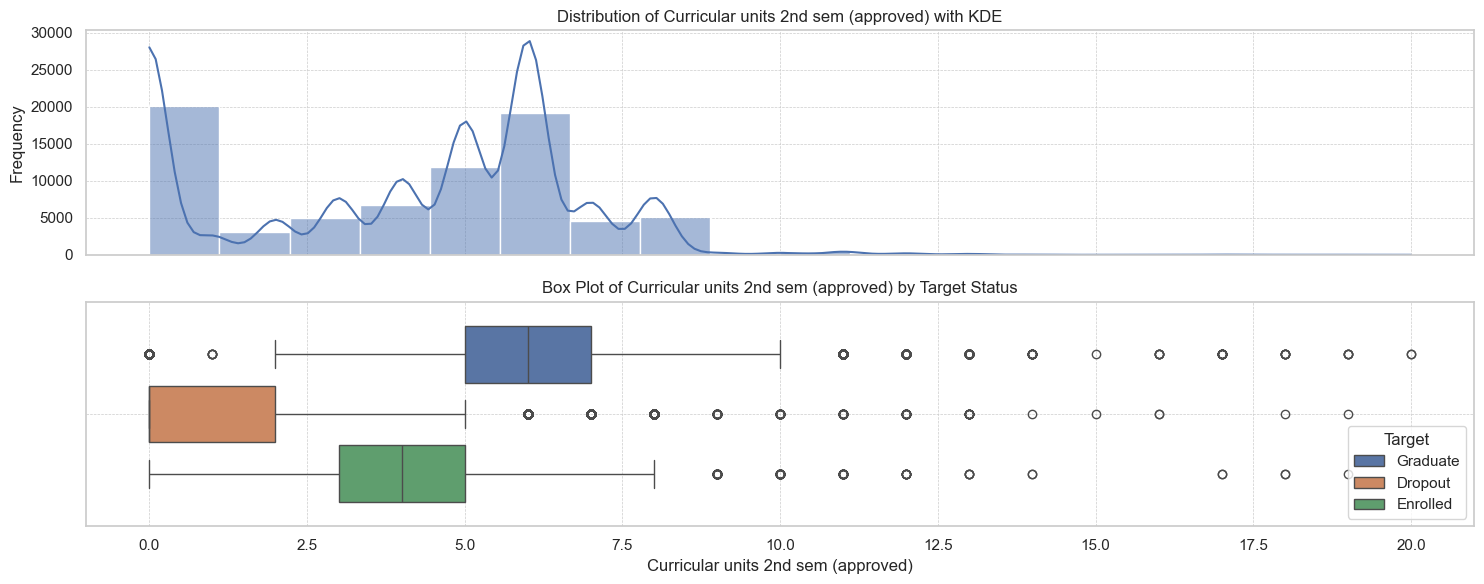

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.07972,0.0,0.07972


,count,mean,std,min,25%,50%,75%,max
Curricular units 2nd sem (approved)_Overall,76518.0,4.007201,2.772956,0.0,1.0,5.0,6.0,20.0
Curricular units 2nd sem (approved)_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Curricular units 2nd sem (approved)_Upper_Outliers,61.0,16.426230,1.820797,14.0,14.0,17.0,18.0,20.0


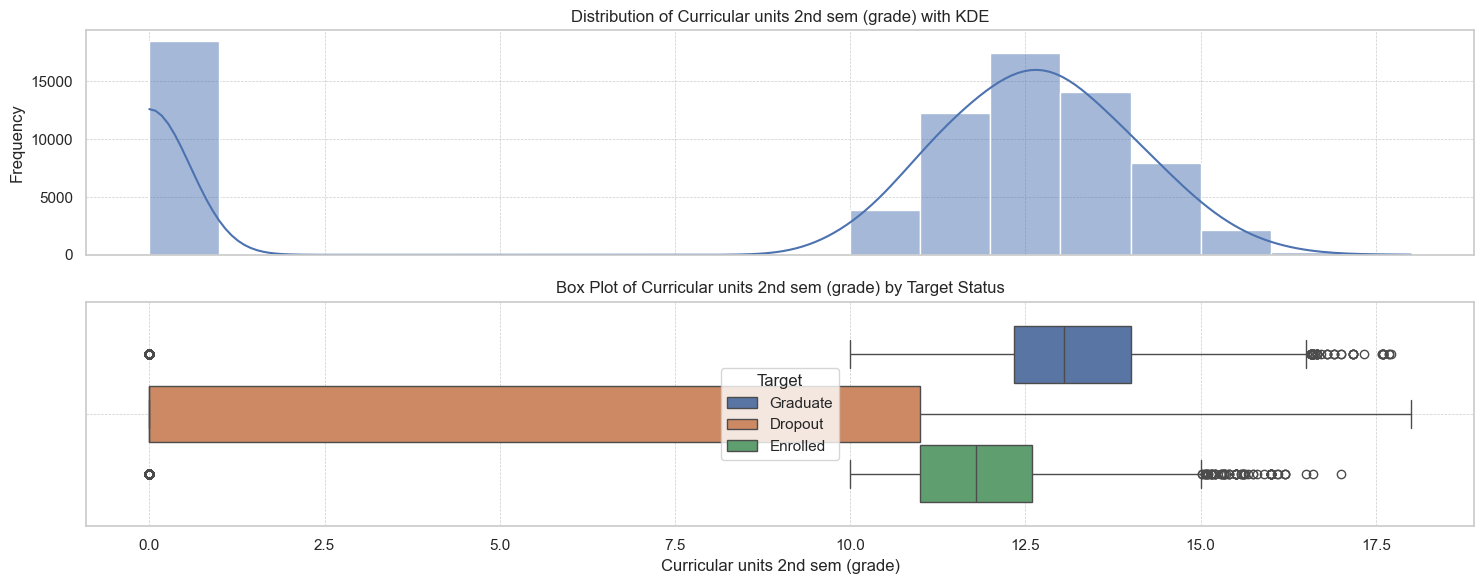

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,24.153794,24.153794,0.0


,count,mean,std,min,25%,50%,75%,max
Curricular units 2nd sem (grade)_Overall,76518.0,9.626085,5.546035,0.0,10.0,12.142857,13.244048,18.0
Curricular units 2nd sem (grade)_Lower_Outliers,18482.0,0.000173,0.017776,0.0,0.0,0.000000,0.000000,2.2
Curricular units 2nd sem (grade)_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


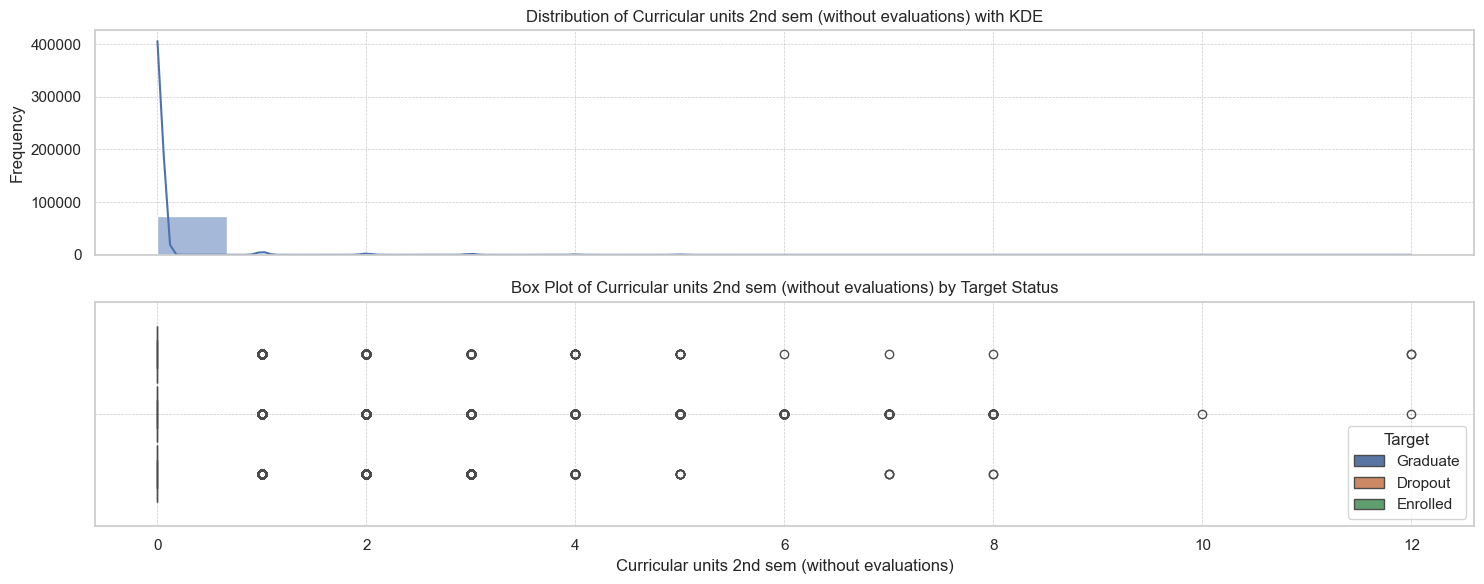

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,2.804569,0.0,2.804569


,count,mean,std,min,25%,50%,75%,max
Curricular units 2nd sem (without evaluations)_Overall,76518.0,0.062443,0.462107,0.0,0.0,0.0,0.0,12.0
Curricular units 2nd sem (without evaluations)_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Curricular units 2nd sem (without evaluations)_Upper_Outliers,2146.0,2.226468,1.672475,1.0,1.0,2.0,3.0,12.0


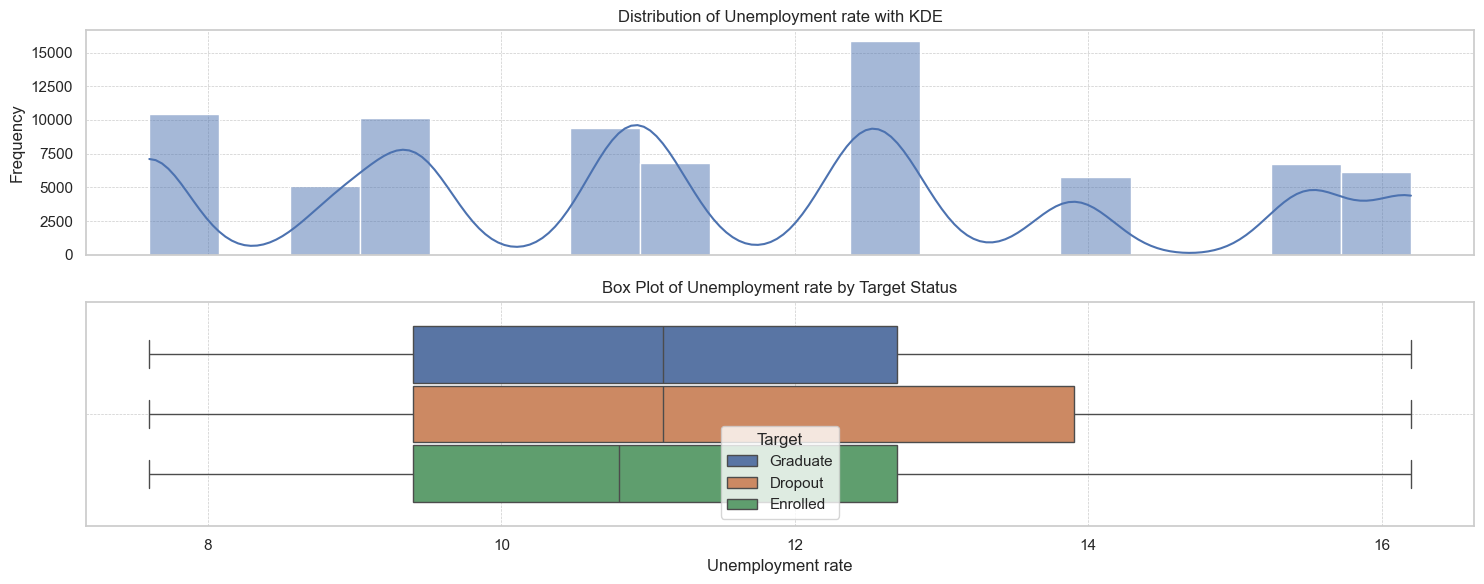

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Unemployment rate_Overall,76518.0,11.52034,2.653375,7.6,9.4,11.1,12.7,16.2
Unemployment rate_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unemployment rate_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


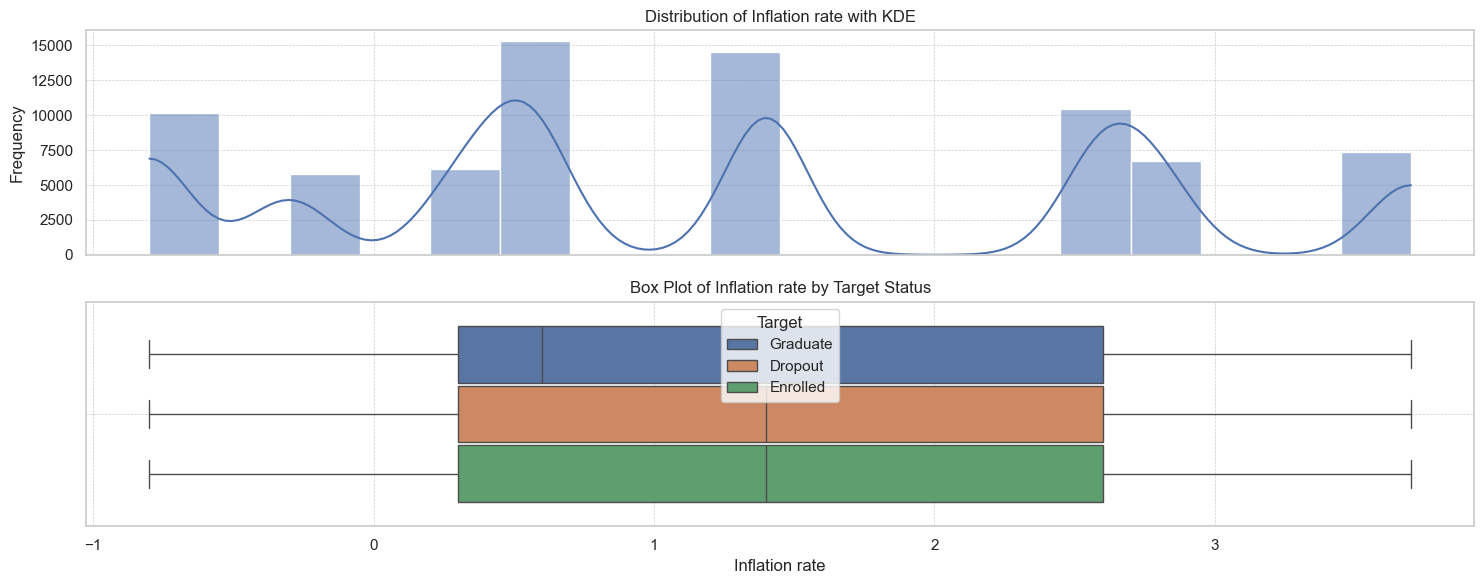

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Inflation rate_Overall,76518.0,1.228218,1.398816,-0.8,0.3,1.4,2.6,3.7
Inflation rate_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inflation rate_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


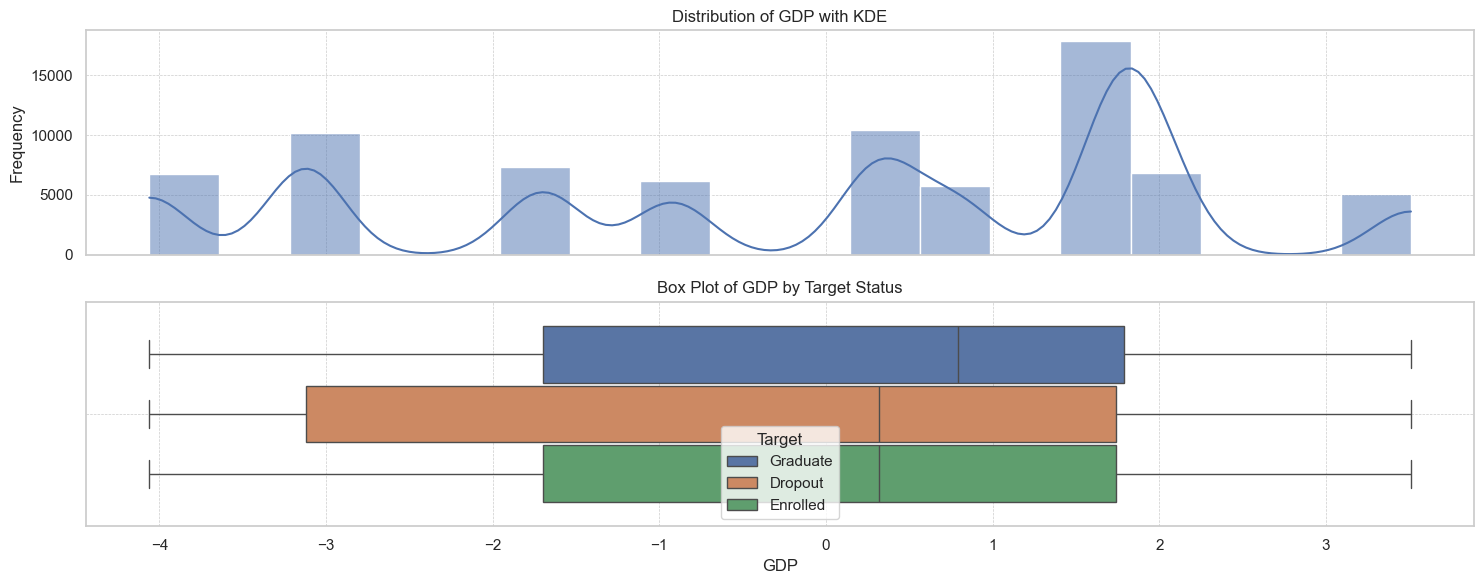

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
GDP_Overall,76518.0,-0.080921,2.251382,-4.06,-1.7,0.32,1.79,3.51
GDP_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GDP_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
for col in num_cols:
    outliers, summary = sd.analyze.numerical_feature(df=train, feature=col, target='Target')
    display(outliers)
    display(summary)

Next task is to create a stratified k fold from the train set to validate models before building final model. By validating models on different folds, we can get an idea of how well the model will perform on unseen data. The target variable is highly imbalanced, so we will use stratified k fold to ensure that each fold has the same proportion of target variable as the original dataset.